https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

In [ ]:
# https://github.com/jeffalstott/powerlaw



### тут же ищем параметры для power law

находим параметры повер лау для шагов разной длительности. также смотрим, как отличаются параметры возле стен, в углах, в центре поля

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

### Load Trajectories (or preproc)

In [4]:
def open_preprocessed_data(fname):
    import pickle
    with open(fname, 'rb') as inp:
        sub_trajs_list = pickle.load(inp)
    return sub_trajs_list

# Open pre-processed files (or use preproc functions for raw data)
PATH = 'preprocessed_dataset/'
dfs_names = ['tr11', 'tr12', 'tr2','tr3','tr4','tr5','tr6','tr7', 'tr91','tr92']


df_dict_subtraj = {}
for tr_name in dfs_names:
    tr = open_preprocessed_data(PATH + tr_name + '.pkl')
    df_dict_subtraj[tr_name] = tr

df_dict = {}
for k, df in df_dict_subtraj.items():
    df_dict[k] = pd.concat(df)

## If raw dataset:
# 1. cut_jumps;
# 2. rescale x and y coords to fit area size 
# 3. divide trajectories into sub-trajectories to remove inconsistent dt and Nans
# 4. resample to required dt

(5818,)
(5058,)


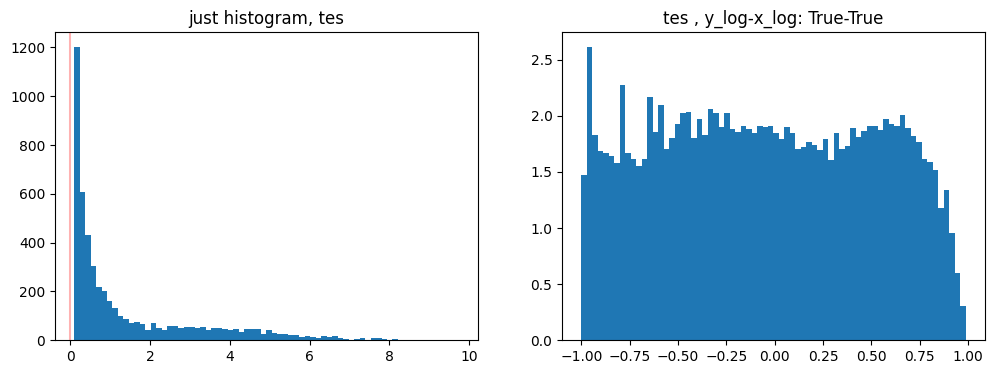

In [110]:
def plot_step_lens_hist(df, binn, hist_title,
                        y_log=True, x_log=False):
    dx = df['x'].diff()
    dy = df['y'].diff()
    dx.iloc[0], dy.iloc[0] = 0., 0.

    ## Ignore gaps in recording (== 0.)
    mask = dx.index != 0
    dx = dx * 1*mask
    dy = dy * 1*mask    

    xy = (dx**2 + dy**2)**0.5
    print(xy.shape)
    xy = xy[xy >= 0.1]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    print(xy.shape)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].hist(xy, bins=binn)
    ax[0].axvline(0, alpha=0.3, c='red')
    ax[0].set_title(f'just histogram, {hist_title}')

    xy = np.log10(xy) if x_log else xy

    hist, bin_edges = np.histogram(xy, bins=binn)
    if y_log:
        hist = np.log10(hist)
    ax[1].bar(bin_edges[:-1], hist, align='edge', width=np.diff(bin_edges))
    ax[1].set_title(f'{hist_title} , y_log-x_log: {y_log}-{x_log}')
    plt.show()

    return hist, bin_edges

h, xybins = plot_step_lens_hist(df_dict['tr11'], 70, 'tes', y_log=True, x_log=True)

# убывание в лог лог по параболе??? - нет, у японца кст по параболе, если присмотрется
# в просто коррдинатах это log нормальное распределение 
# TODO: POWER LAW! - gives us nothing, actually :)
# Meaningful insight: mouse sits a lot (или просто шебуршит на месте),
# and if it moves, the steps len is uniformly distributed according to log-log hist 

In [98]:
# https://stats.stackexchange.com/questions/155552/what-does-log-uniformly-distribution-mean

(5818,)
(5058,)


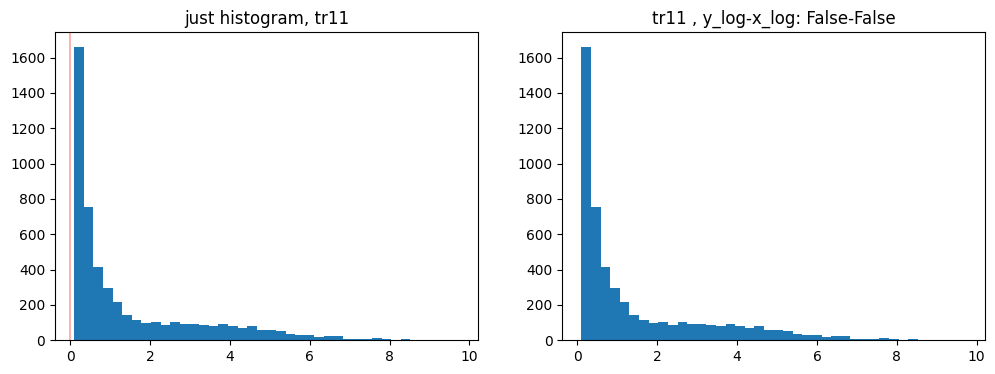

(5814,)
(4611,)


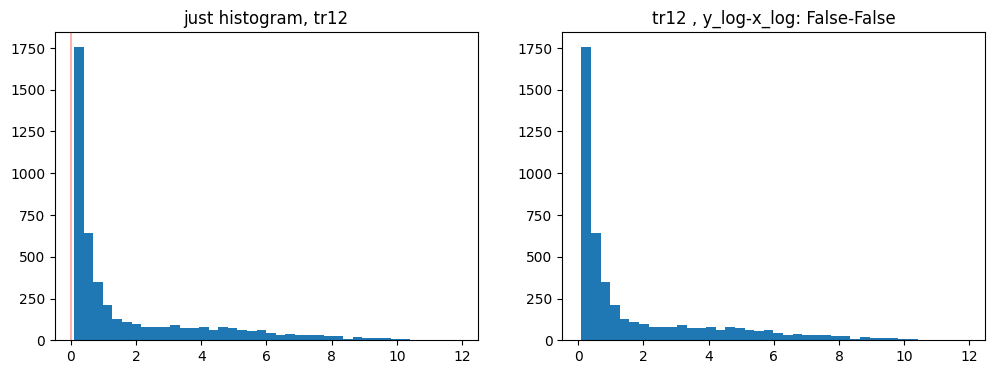

(5788,)
(4663,)


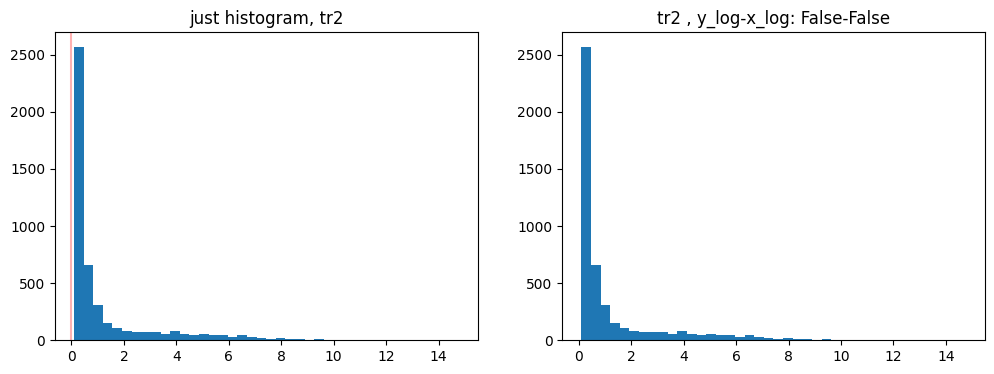

(2214,)
(1890,)


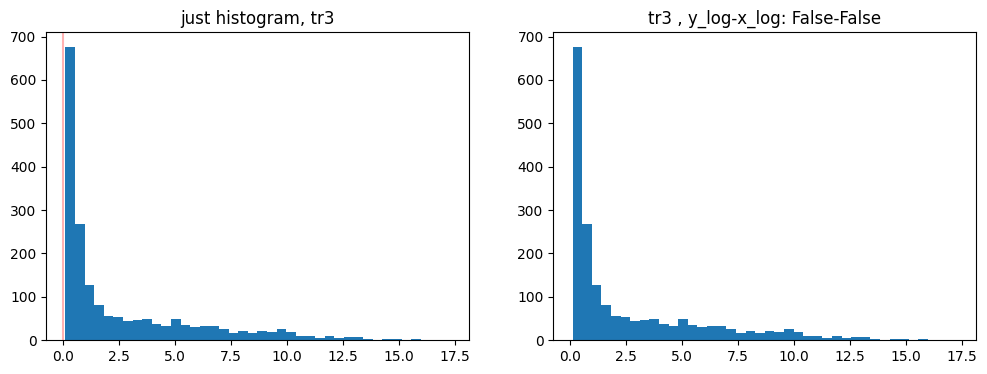

(859,)
(753,)


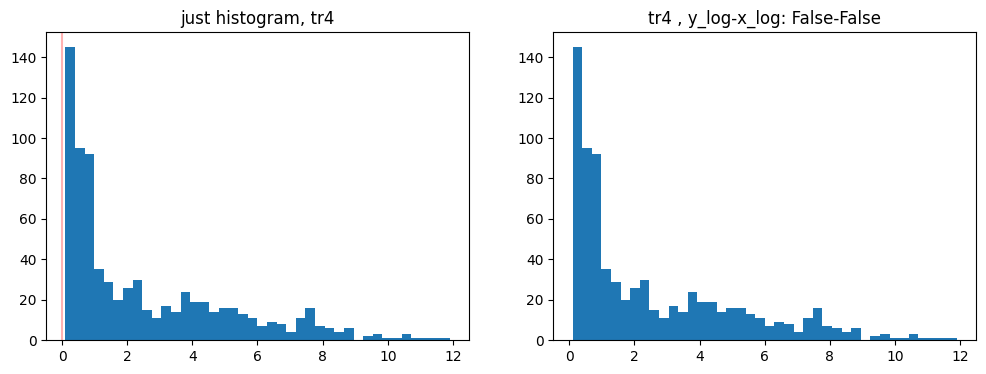

(2921,)
(2640,)


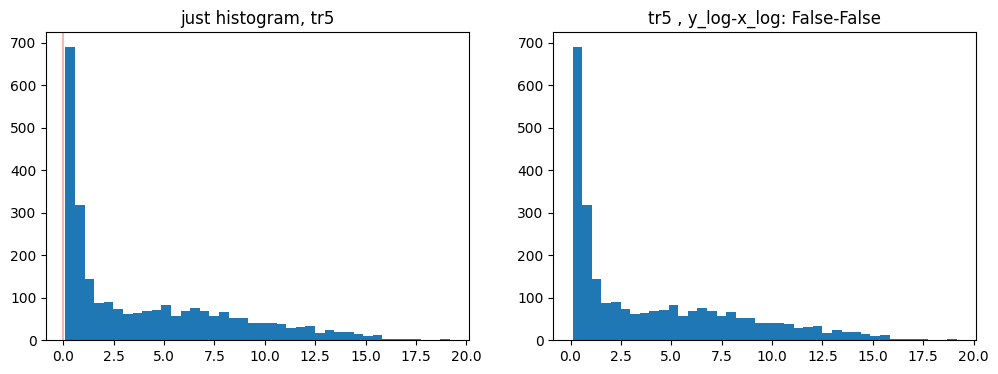

(5220,)
(4443,)


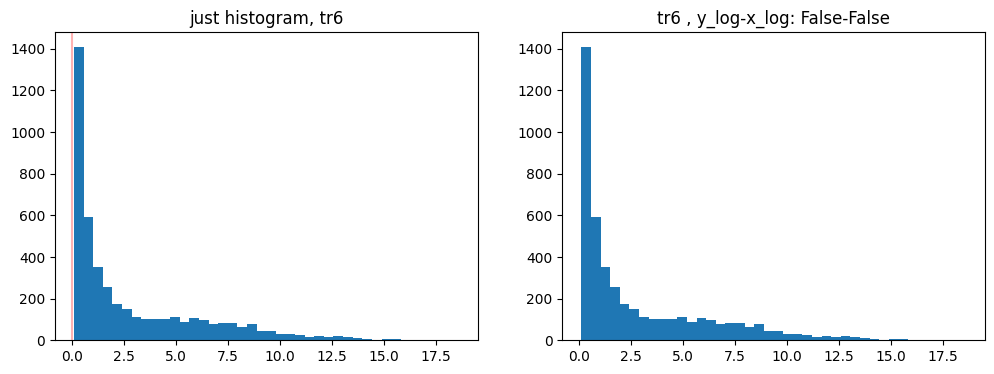

(5010,)
(4445,)


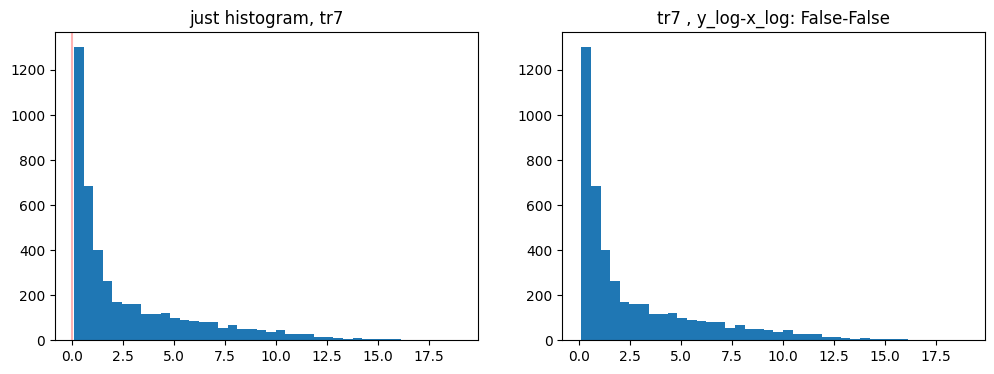

(5659,)
(4705,)


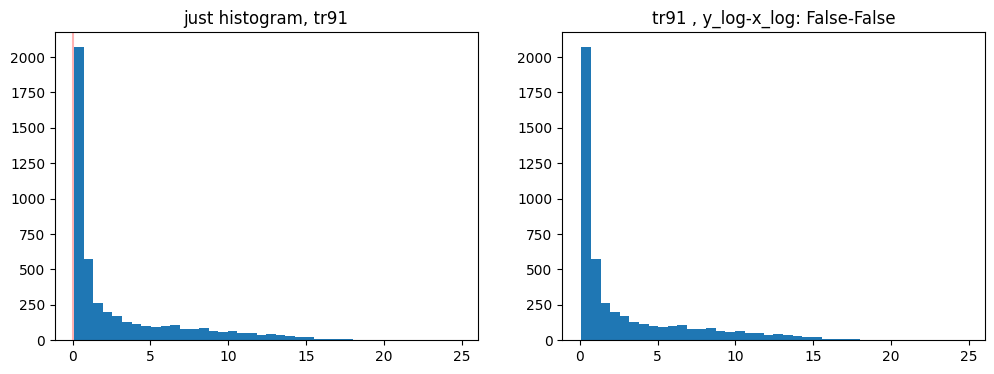

(4866,)
(3455,)


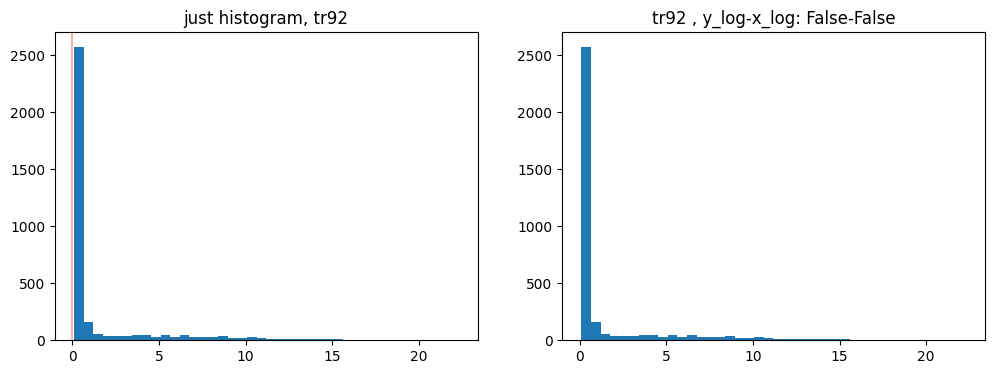

In [119]:
df_steps_hist = {}
for k, df in df_dict.items():

    h, xybins = plot_step_lens_hist(df, 40, k , y_log=False, x_log=False)
    df_steps_hist[k] = [h, xybins]

    # TODO: what is the name of x-axis ??? len of area len units ???
    # TODO: threshold for dropping "sitting" column
    # TODO: should take not so many bins for proper generalization 

## Fit power law and power law with bias and check the quality of fit

In [61]:
# TODO: fit linear with log-log, compare using AIC, BIC, etc
# https://sci-hub.ru/10.1007/s10867-015-9406-z

In [120]:
def power_law(x, m, c):
    return c * x**m

def powerlaw_with_bias(x, m, c, c0):
    return c * x**m + c0

def exp_law(x, m, c):
    return m * np.exp(-m*(x-c))
    # return c * np.exp(m*x)


(5818,)
(5058,)
for tr11:
(0.32607104718938645, 0.10008970048305967, 9.625157290977787)


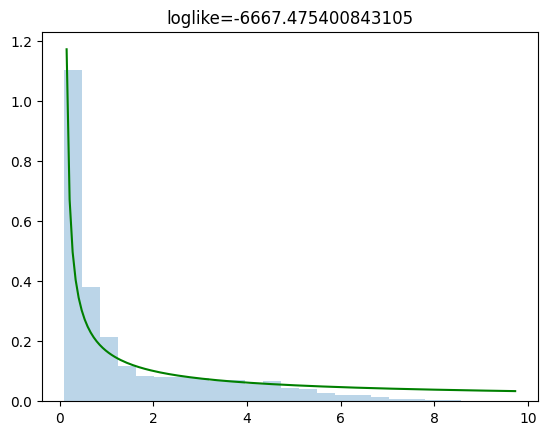

(5814,)
(4611,)
for tr12:
(0.3064917805582104, 0.10018718143683002, 11.784741730509609)


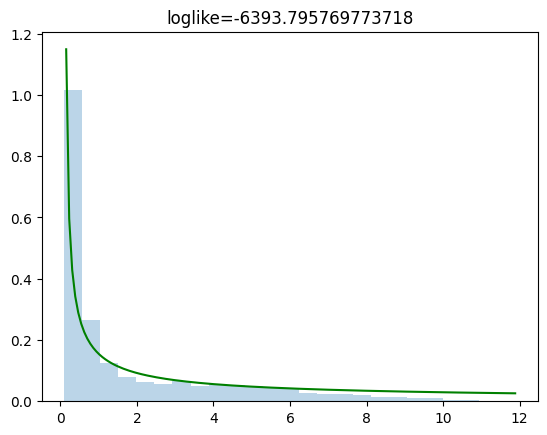

(5788,)
(4663,)
for tr2:
(0.2501632913865825, 0.1003595316486141, 14.653953233559912)


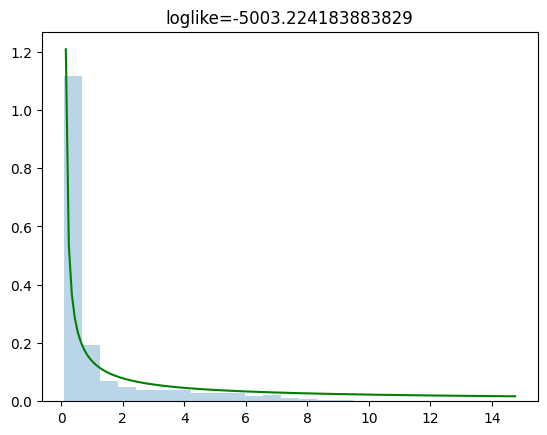

(2214,)
(1890,)
for tr3:
(0.32597761171968803, 0.10008647840206654, 17.173285818095046)


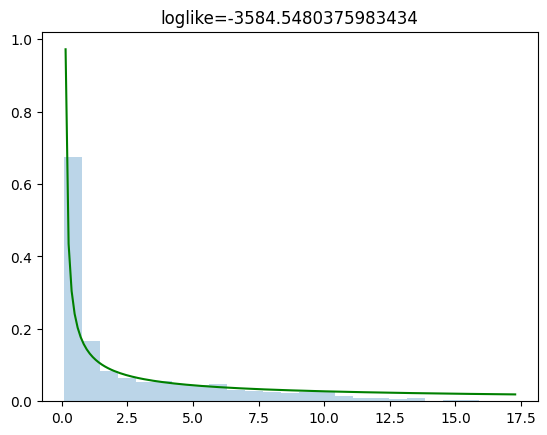

(859,)
(753,)
for tr4:
(0.409758366330534, 0.10105561289027237, 11.797991463270472)


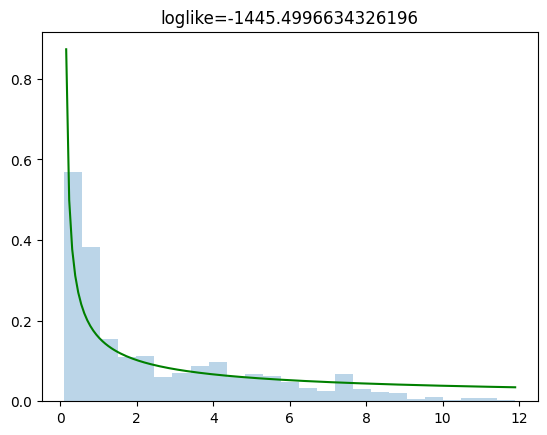

(2921,)
(2640,)
for tr5:
(0.3843087121202514, 0.10063571219966148, 19.068865443720455)


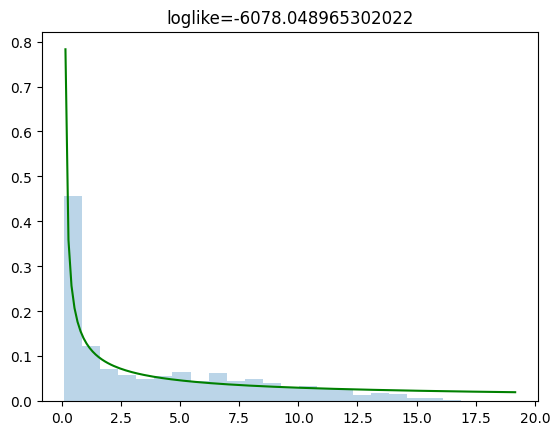

(5220,)
(4443,)
for tr6:
(0.3383988151021453, 0.10007286006273829, 18.49449277786054)


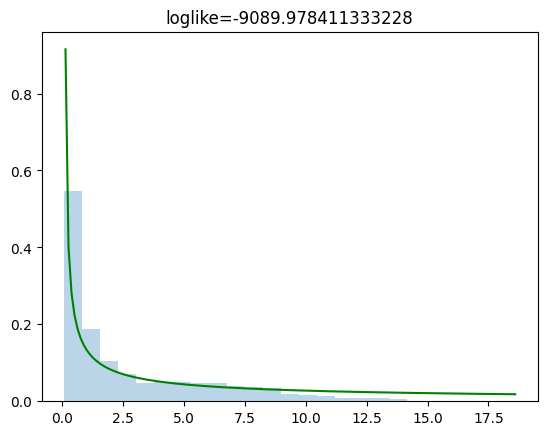

(5010,)
(4445,)
for tr7:
(0.34280010001777517, 0.10019191670451995, 18.85768507889961)


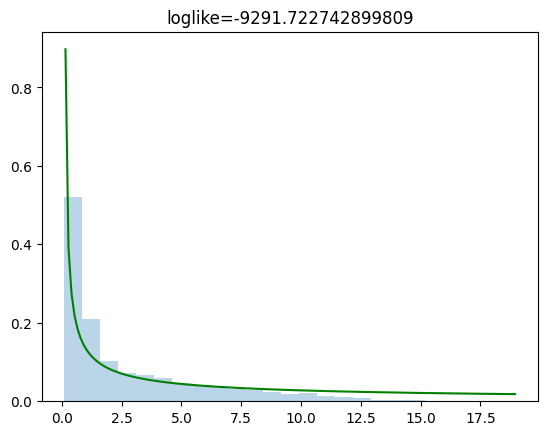

(5659,)
(4705,)
for tr91:
(0.2988360597764998, 0.10008795942771263, 24.697659577891542)


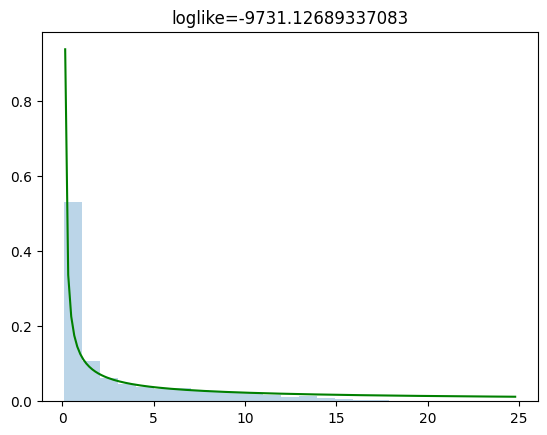

(4866,)
(3455,)
for tr92:
(0.21648656898474722, 0.10003500283503079, 22.17329855715098)


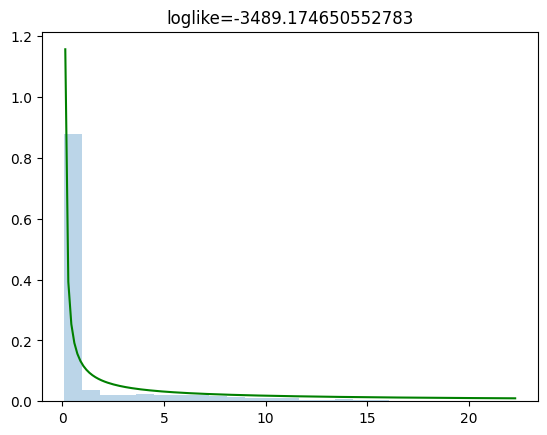

In [143]:
from scipy.stats import powerlaw

for k, df in df_dict.items():
    dx = df['x'].diff()
    dy = df['y'].diff()
    dx.iloc[0], dy.iloc[0] = 0., 0.

    ## Ignore gaps in recording (== 0.)
    mask = dx.index != 0
    dx = dx * 1*mask
    dy = dy * 1*mask    

    xy = (dx**2 + dy**2)**0.5
    print(xy.shape)
    xy = xy[xy >= 0.1]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    print(xy.shape)

    print(f'for {k}:')

    exp_est = 1.0
    x0_est = 0.
    scale_est = 1.
    sol1 = powerlaw.fit(xy, exp_est, loc=x0_est, scale=scale_est)

    print(sol1)
    # params = sol1

    # Plot CDF of the noisy data and the fit
    x_arr = np.linspace(np.min(xy)+0.05, np.max(xy), 150)

    yfit = powerlaw.pdf(x_arr, *sol1)
    plt.plot(x_arr, yfit, color='g', label='Fit')
    plt.hist(xy, bins=25, alpha=0.3, density=True)
    
    res = np.sum(np.log(powerlaw.pdf(xy, *sol1)))
    plt.title(f"loglike={res}")
    plt.show()
    # break

(5818,)
(5058,)
for tr11:
(0.10008970048305968, 1.3853321451431038)


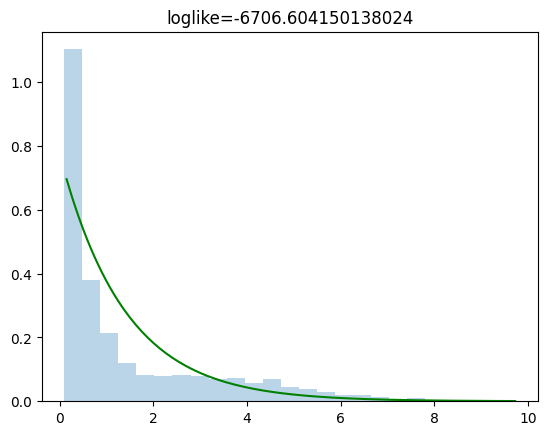

(5814,)
(4611,)
for tr12:
(0.10018718143683003, 1.7256554673690583)


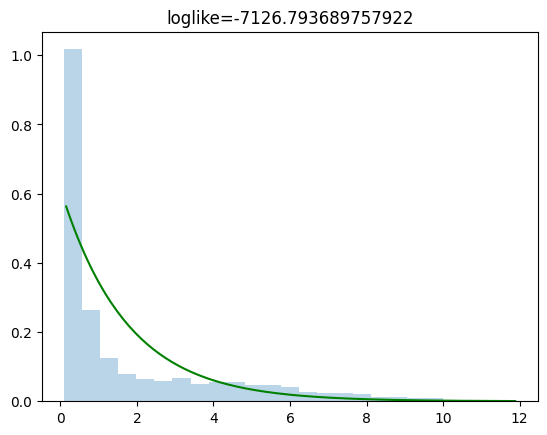

(5788,)
(4663,)
for tr2:
(0.10035953164861411, 1.1248442882301515)


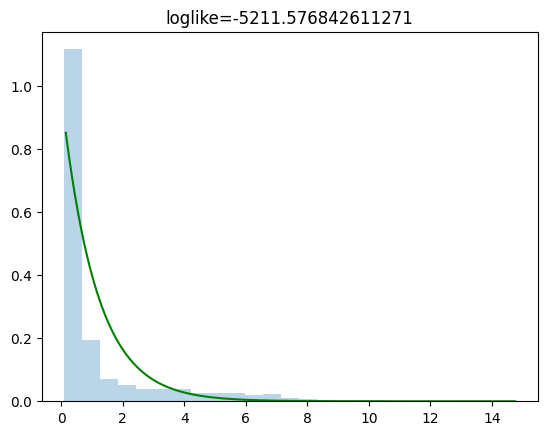

(2214,)
(1890,)
for tr3:
(0.10008647840206655, 2.5624772214854294)


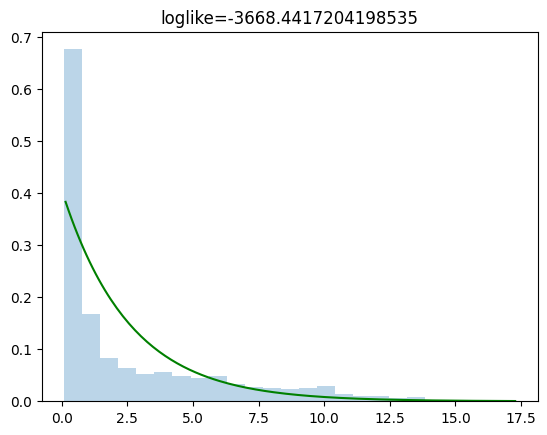

(859,)
(753,)
for tr4:
(0.10105561289027239, 2.435848759273037)


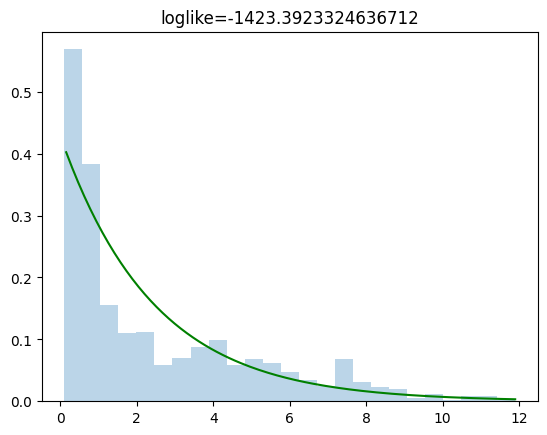

(2921,)
(2640,)
for tr5:
(0.1006357121996615, 4.0169275191746845)


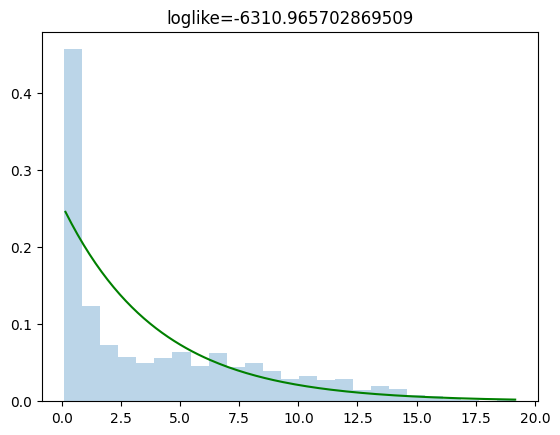

(5220,)
(4443,)
for tr6:
(0.1000728600627383, 2.753024946914883)


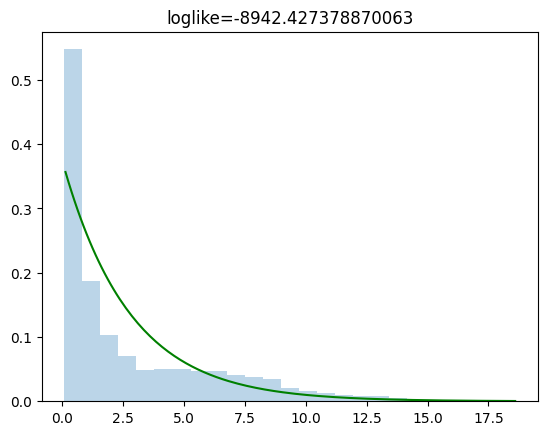

(5010,)
(4445,)
for tr7:
(0.10019191670451996, 2.6628253161604243)


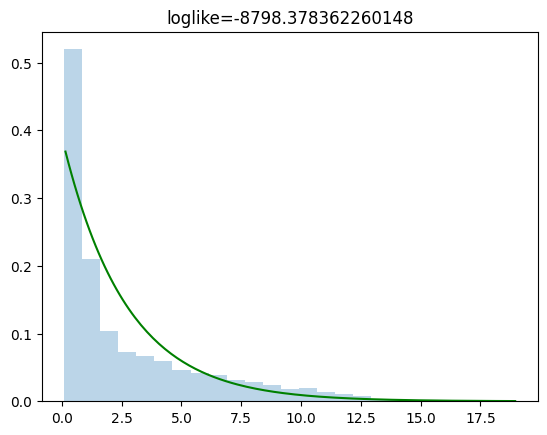

(5659,)
(4705,)
for tr91:
(0.10008795942771265, 2.9188907582322865)


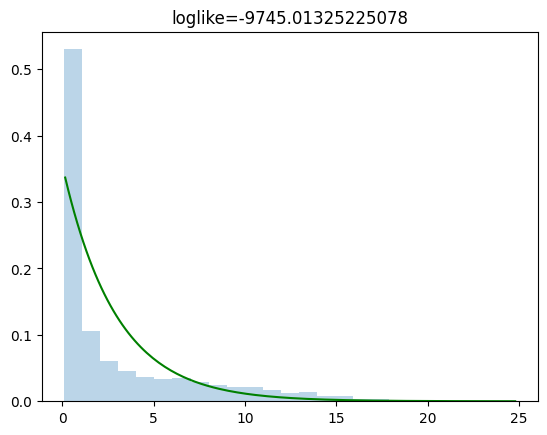

(4866,)
(3455,)
for tr92:
(0.1000350028350308, 1.4835509377940992)


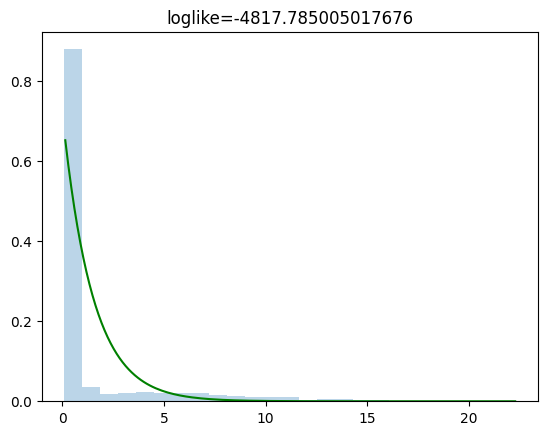

In [144]:
from scipy.stats import expon

for k, df in df_dict.items():
    dx = df['x'].diff()
    dy = df['y'].diff()
    dx.iloc[0], dy.iloc[0] = 0., 0.

    ## Ignore gaps in recording (== 0.)
    mask = dx.index != 0
    dx = dx * 1*mask
    dy = dy * 1*mask    

    xy = (dx**2 + dy**2)**0.5
    print(xy.shape)
    xy = xy[xy >= 0.1]  # TODO: threshold for sitting = 0.1 unit, need to use cm!
    print(xy.shape)

    print(f'for {k}:')

    exp_est = 1.0
    x0_est = 0.
    scale_est = 1.
    sol1 = expon.fit(xy, loc=x0_est, scale=scale_est)

    print(sol1)
    # params = sol1

    # Plot CDF of the noisy data and the fit
    x_arr = np.linspace(np.min(xy)+0.05, np.max(xy), 150)

    yfit = expon.pdf(x_arr, *sol1)
    plt.plot(x_arr, yfit, color='g', label='Fit')
    plt.hist(xy, bins=25, alpha=0.3, density=True)
    
    res = np.sum(np.log(expon.pdf(xy, *sol1)))
    plt.title(f"loglike={res}")
    plt.show()
    # break

In [124]:
sol1

(0.32607104718938645, 0.10008970048305967, 9.625157290977787)

for tr11:
For exp law 0.988251435837725
For power law 0.9970626937582825


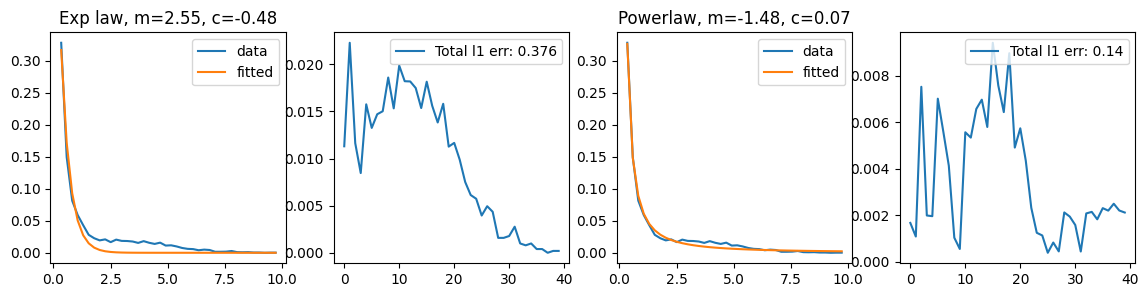

for tr12:
For exp law 0.9921227826908049
For power law 0.996809144390801


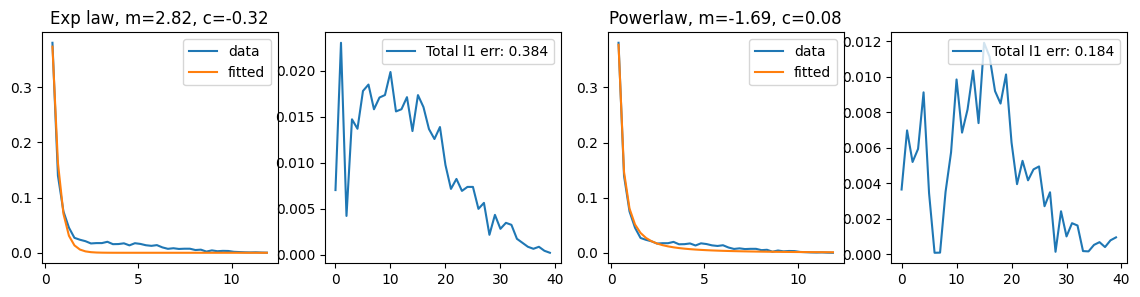

for tr2:
For exp law 0.9963571829678096
For power law 0.9989626259485358


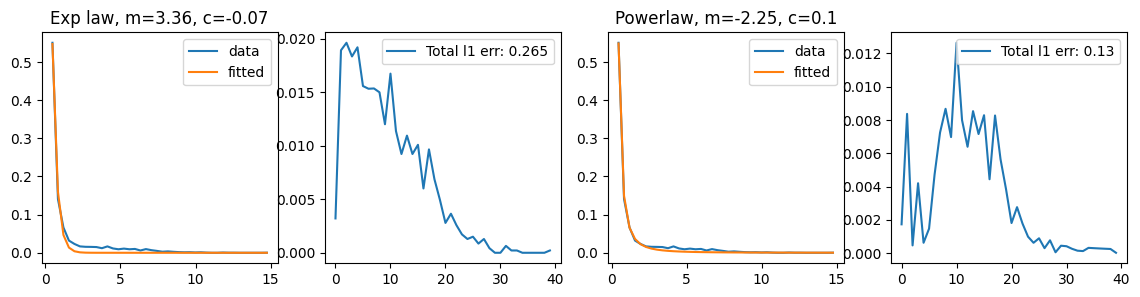

for tr3:
For exp law 0.9889704561732774
For power law 0.9951904504821464


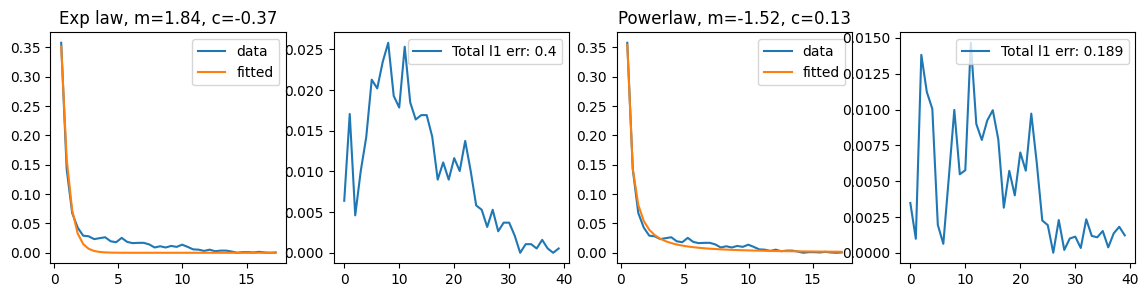

for tr4:
For exp law 0.9567540508519187
For power law 0.9673214342600812


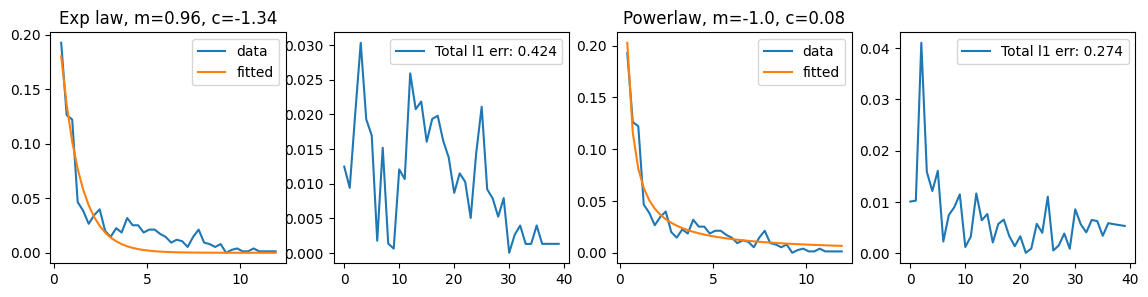

for tr5:
For exp law 0.9710460614562377
For power law 0.9799216043991109


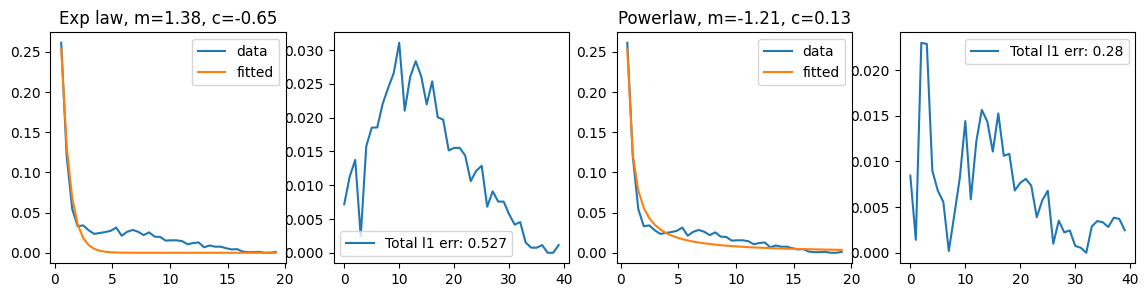

for tr6:
For exp law 0.980781902874087
For power law 0.9956809290404924


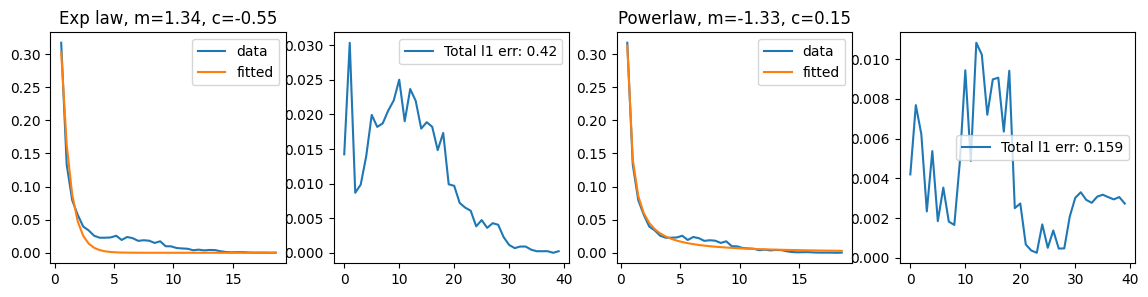

for tr7:
For exp law 0.9842267147129032
For power law 0.9968576418573183


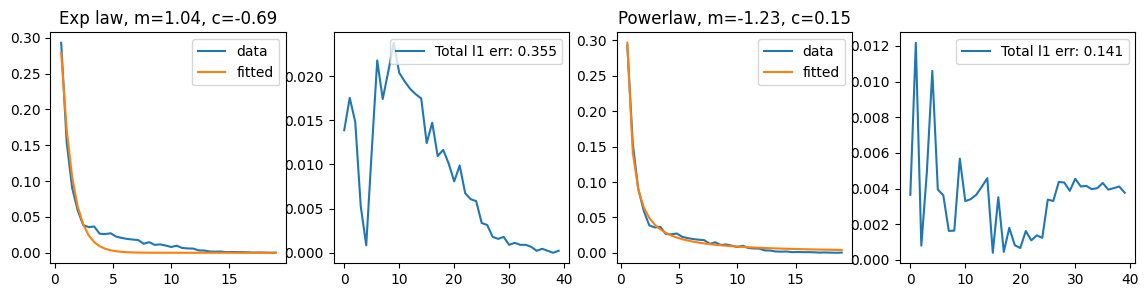

for tr91:
For exp law 0.9896781188624723
For power law 0.9954952061290471


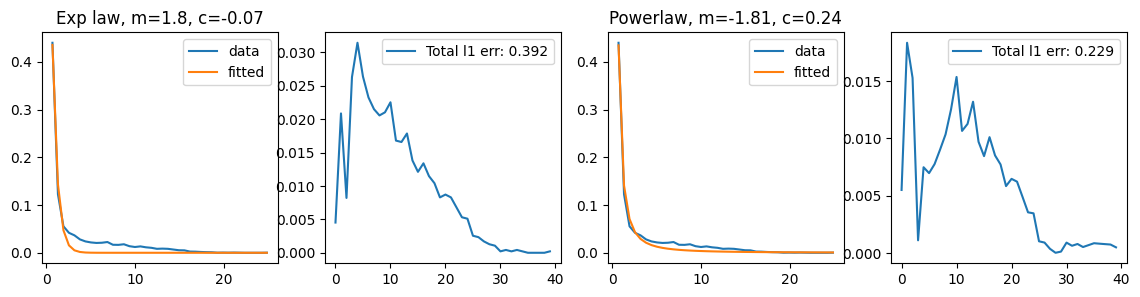

for tr92:
For exp law 0.9991853982879588
For power law 0.9992610427072799


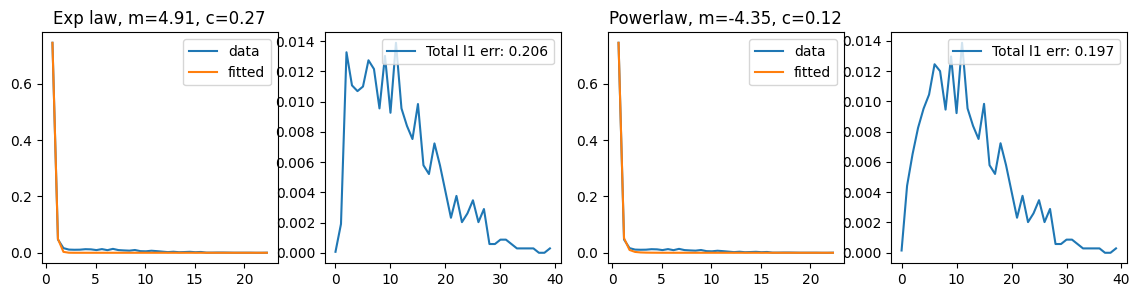

In [122]:
import scipy.stats

for k, df in df_steps_hist.items():
    x = df[1][1:]  # vals
    y = df[0] / np.sum(df[0])  # freqs
    # y = df[0]  # freqs
    print(f'for {k}:')

    sol1 = curve_fit(power_law, x, y, p0 = np.asarray([1., 10**5]))
    # sol1 = scipy.stats.powerlaw.fit(data_noise, exp_est, loc=x0_est, scale=scale_est)

    # sol2 = curve_fit(powerlaw_with_bias, x, y, 
    #                 p0 = np.asarray([1., 10**3, 0.]), maxfev = 2000)
    sol2 = curve_fit(exp_law, x, y, 
                    p0 = np.asarray([1., 0.,]), maxfev = 2000)
    
    params = sol2[0]
    qq = exp_law(x, params[0], params[1])
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].plot(x, y, label='data')
    ax[0].plot(x, qq, label='fitted')
    ax[0].set_title(f'Exp law, m={round(params[0], 2)}, c={round(params[1], 2)}')
    ax[0].legend()
    # residuals
    res = np.abs(y - qq)
    print('For exp law', np.corrcoef(y, qq)[0, 1])
    ax[1].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[1].legend()

    params = sol1[0]
    qq = power_law(x, params[0], params[1])
    ax[2].plot(x, y, label='data')
    ax[2].plot(x, qq, label='fitted')
    ax[2].set_title(f'Powerlaw, m={round(params[0], 2)}, c={round(params[1], 2)}')
    ax[2].legend()
    # residuals
    res = np.abs(y - qq)
    print('For power law', np.corrcoef(y, qq)[0, 1])
    ax[3].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[3].legend()

    plt.show()

    # TODO: it is better to fit in log coords 
    # since least squares badly fit small values wrt big values
    # min of squares of error is reased with fitting big values 
    
    # 1. x, y => ln(x), ln(y)
    # 2. params = curve_fit(ln(x), ln(y))
    #    y = a*x**b => ln(y) = ln(a) + b * ln(x)
    # 3. => y = exp(ln(a) + b * ln(x))
    # PROFIT

In [10]:
# Make conclusion that power law without bias is better according to residuals

### Fit in log-log coordinates 

(5818,)
(5058,)


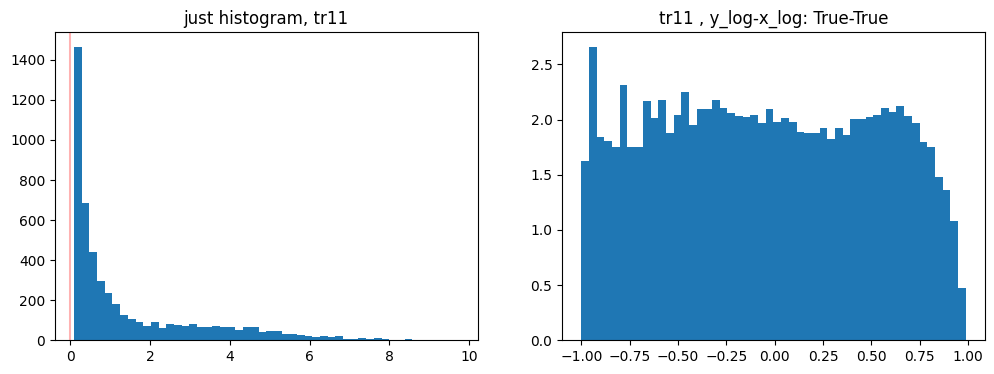

(5814,)
(4611,)


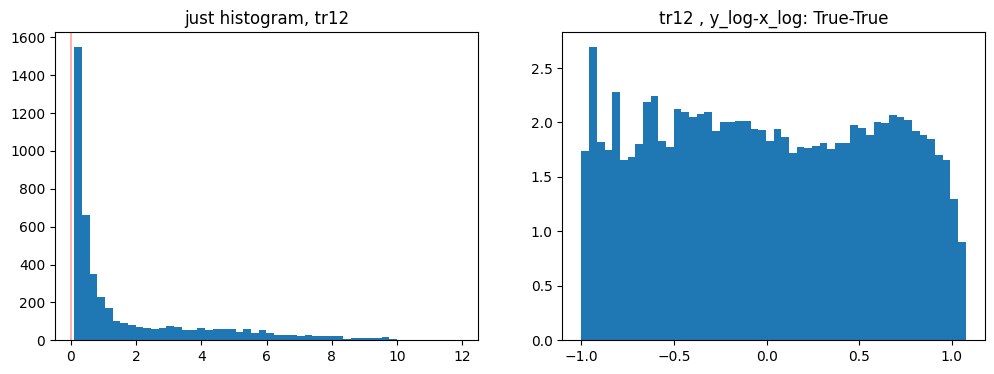

(5788,)
(4663,)


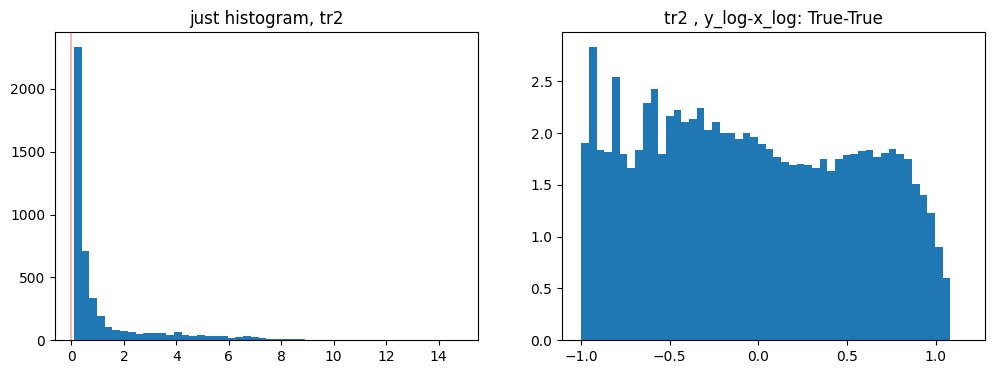

(2214,)
(1890,)


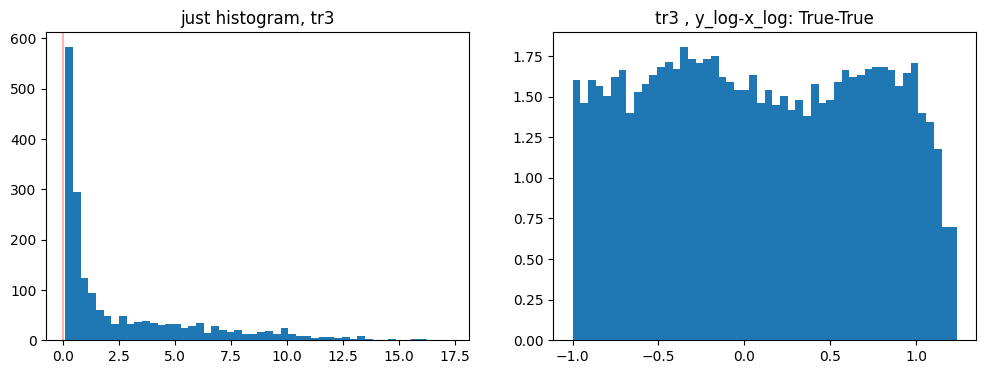

(859,)
(753,)


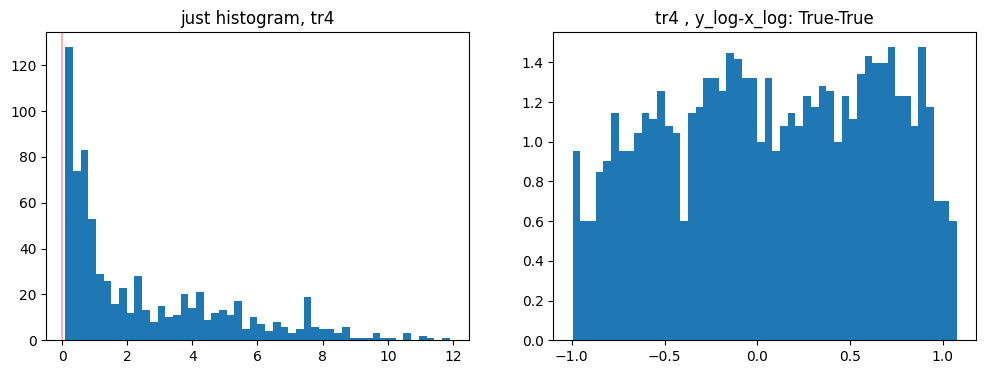

(2921,)
(2640,)


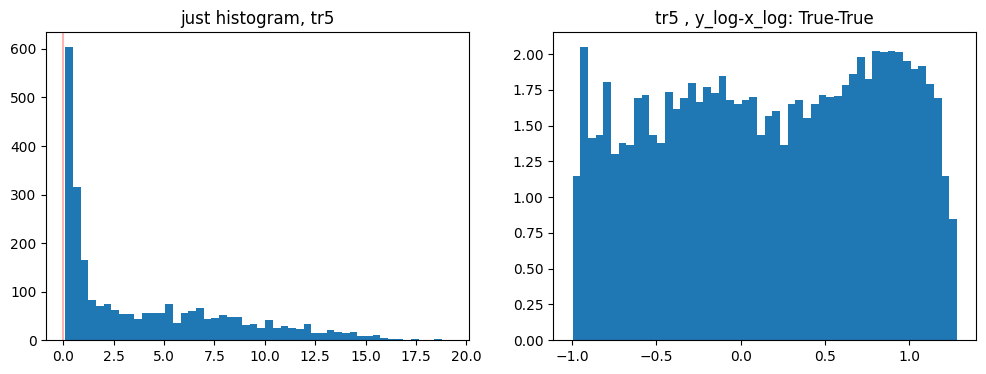

(5220,)
(4443,)


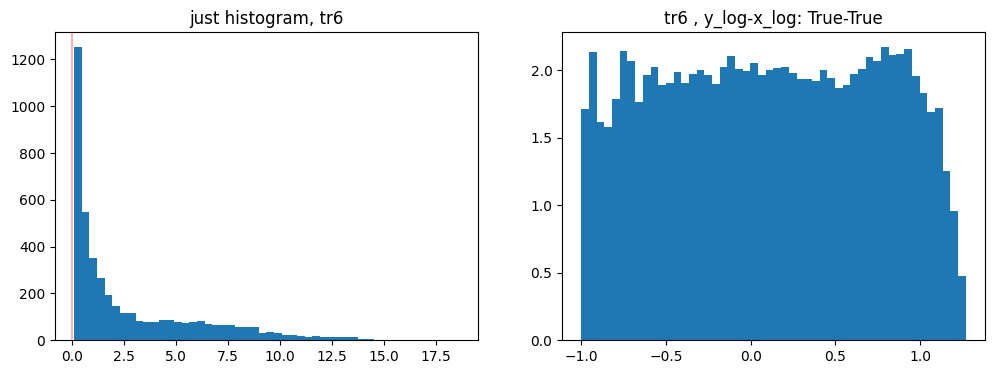

(5010,)
(4445,)


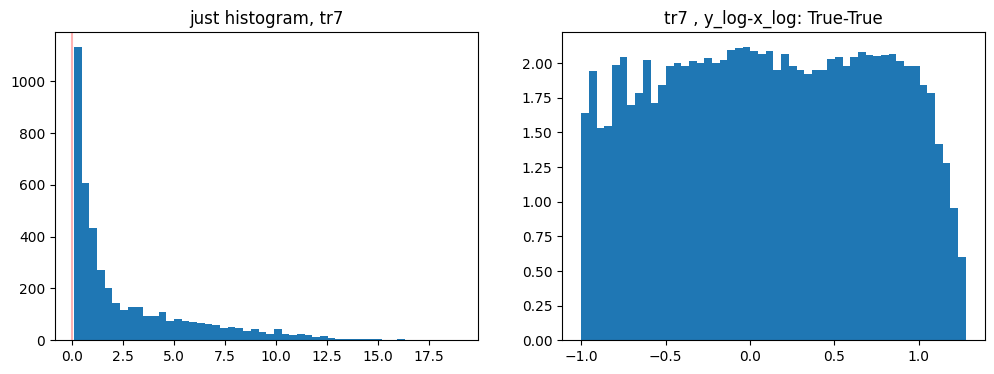

(5659,)
(4705,)


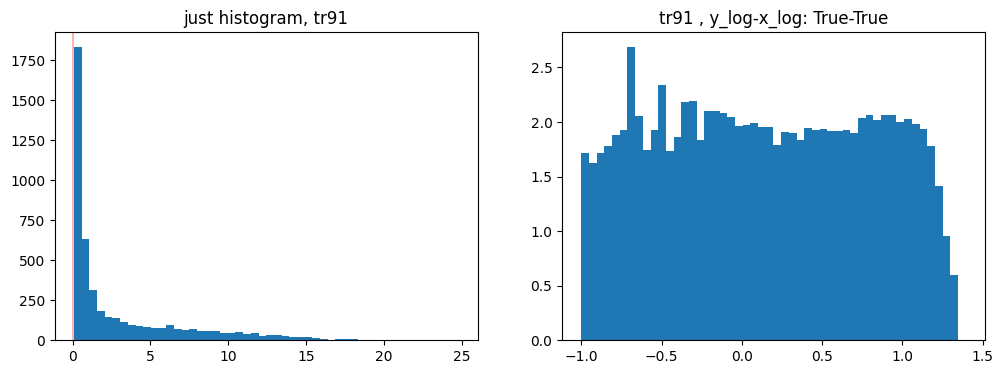

(4866,)
(3455,)


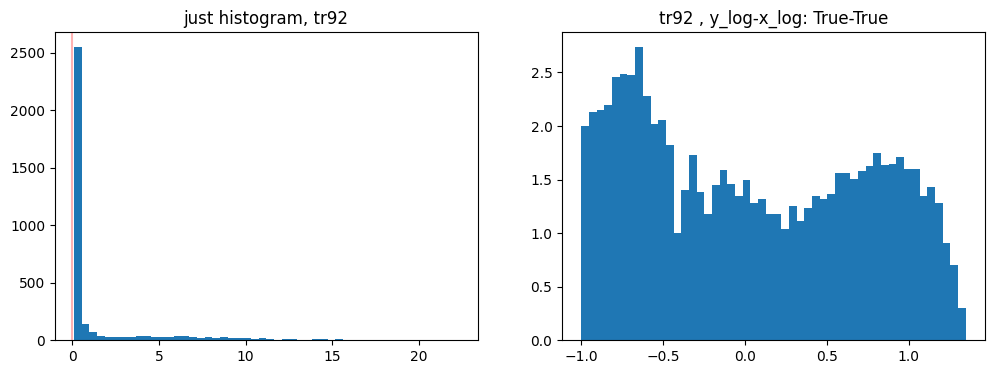

In [102]:
df_steps_hist_log_log = {}
for k, df in df_dict.items():

    h, xybins = plot_step_lens_hist(df, 50, k , y_log=True, x_log=True)
    df_steps_hist_log_log[k] = [h, xybins]

In [103]:
def linear(x, a, b):
    return a * x + b

def parabola(x, a, b, c):
    return a * (x - b)**2 + c

for tr11:
LinregressResult(slope=-0.2304644325834459, intercept=1.9261130401707378, rvalue=-0.4204116656351435, pvalue=0.002367353674756342, stderr=0.07179190318240902, intercept_stderr=0.04119431070211593)


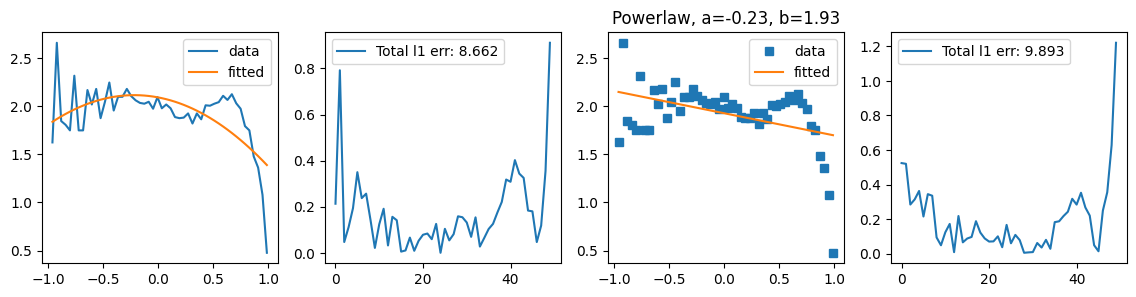

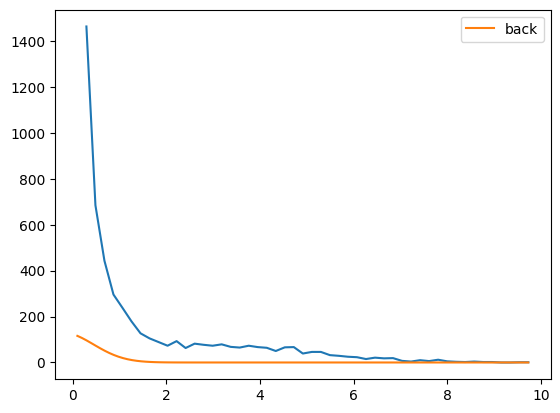

for tr12:
LinregressResult(slope=-0.16212997601092244, intercept=1.9045244156436025, rvalue=-0.3907515179370474, pvalue=0.00502169842631205, stderr=0.05512695764045545, intercept_stderr=0.03315949776843786)


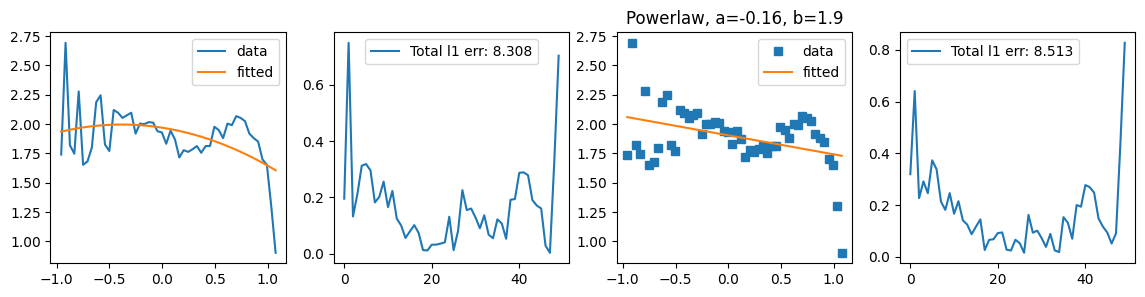

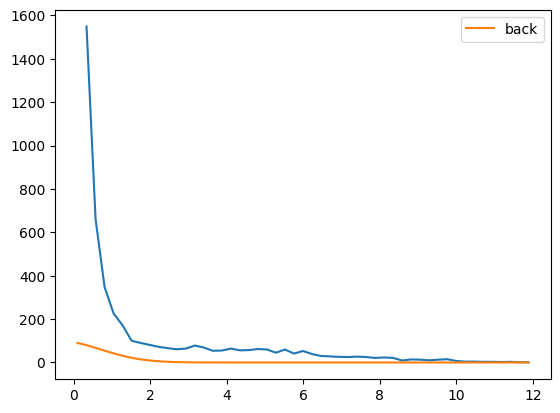

for tr2:
LinregressResult(slope=-0.5539963764561767, intercept=1.8307519161804902, rvalue=-0.6890313938997875, pvalue=3.163545642473883e-08, stderr=0.08410550638981242, intercept_stderr=0.053374067748566796)


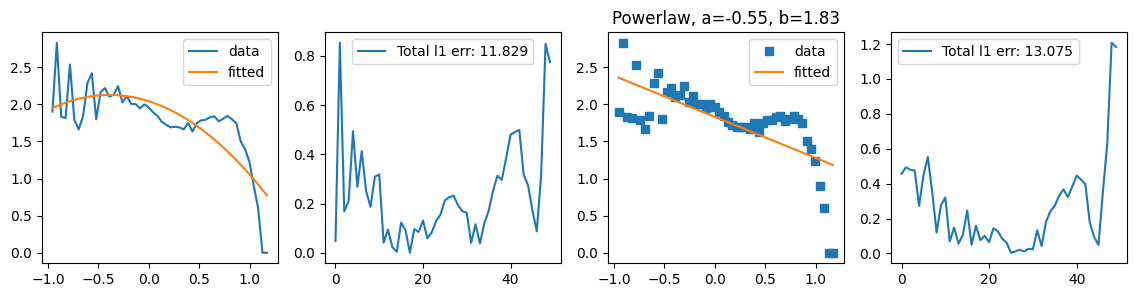

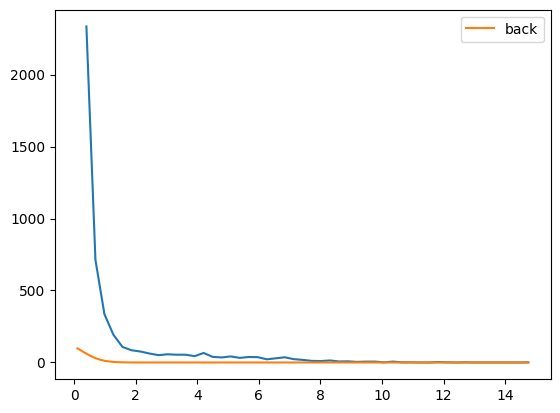

for tr3:
LinregressResult(slope=-0.1294083036676184, intercept=1.5601267223496815, rvalue=-0.3987371790801191, pvalue=0.0041283372731264634, stderr=0.04295908553612953, intercept_stderr=0.028391972430456366)


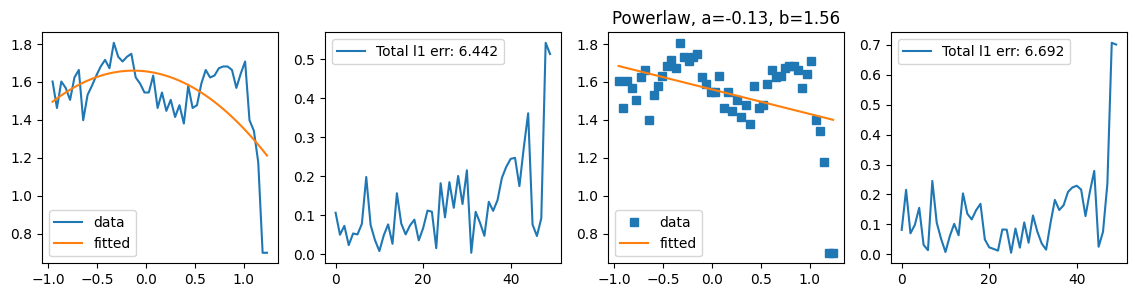

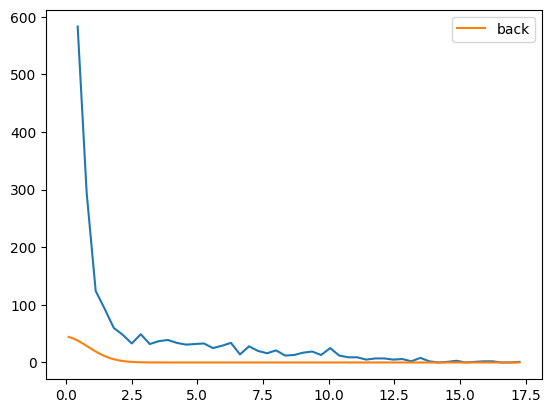

for tr4:
LinregressResult(slope=0.10651943105336681, intercept=1.1150298817450095, rvalue=0.26888100279199134, pvalue=0.05900957696577669, stderr=0.05507475606131376, intercept_stderr=0.03308844963737399)


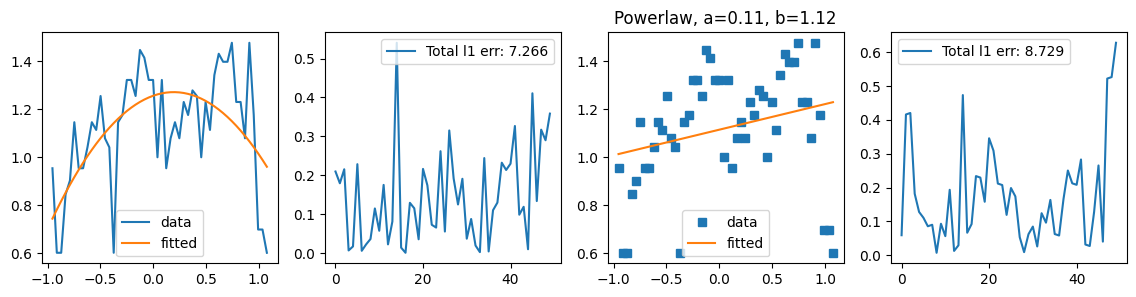

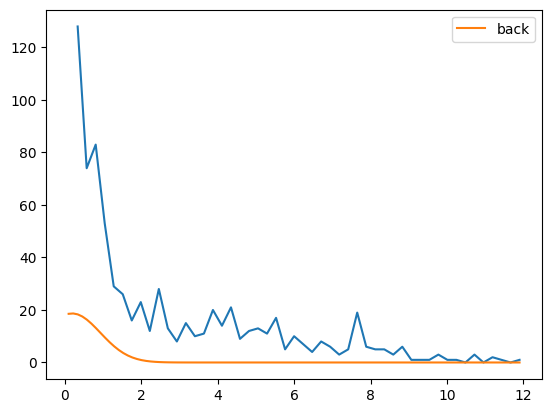

for tr5:
LinregressResult(slope=0.10347592307417003, intercept=1.644173692094154, rvalue=0.27388239135510484, pvalue=0.054274856321813, stderr=0.052447251150263725, intercept_stderr=0.035585245120600545)


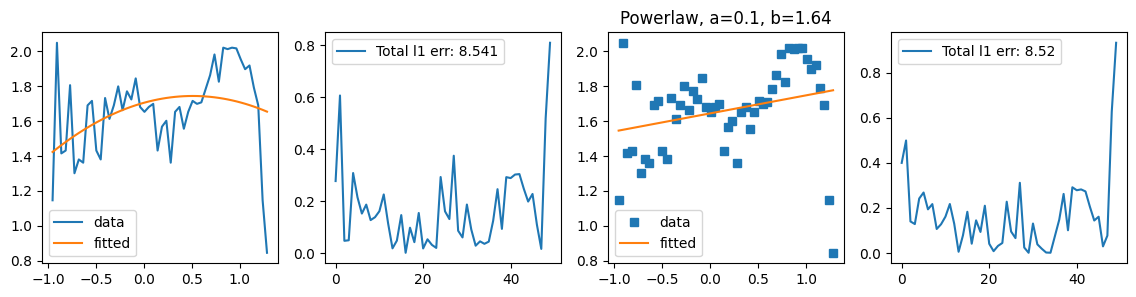

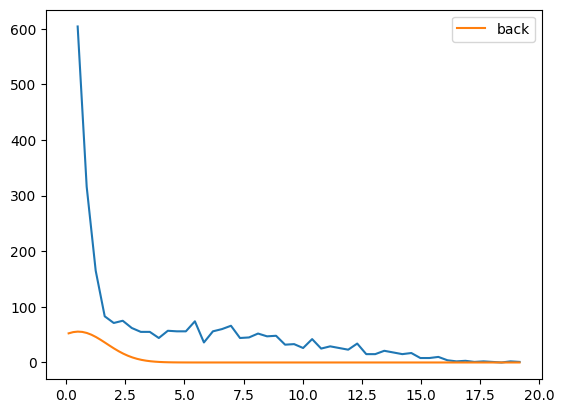

for tr6:
LinregressResult(slope=-0.11992970761117445, intercept=1.9085993409050042, rvalue=-0.2668620416881942, pvalue=0.06101254588231052, stderr=0.06251393928068888, intercept_stderr=0.042107872592299034)


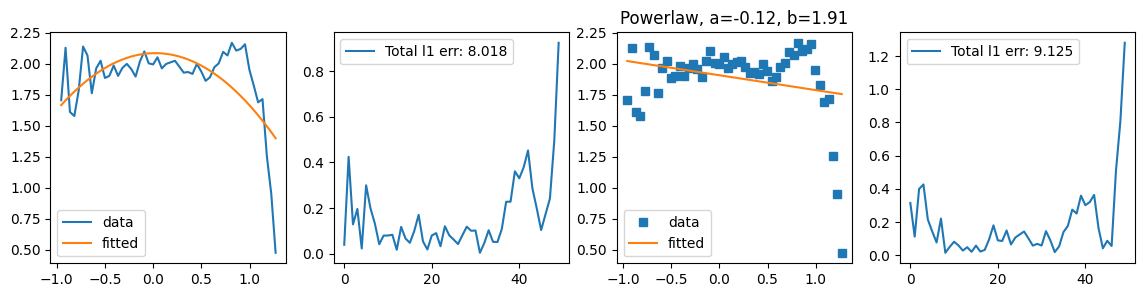

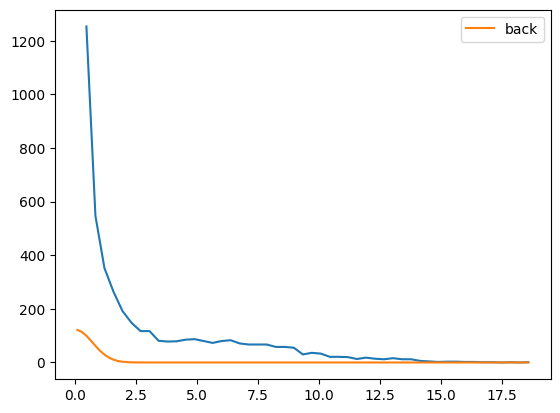

for tr7:
LinregressResult(slope=-0.10126697452345154, intercept=1.9048751795380863, rvalue=-0.22785903483930234, pvalue=0.11150401802475532, stderr=0.06246022079145593, intercept_stderr=0.04227693274504665)


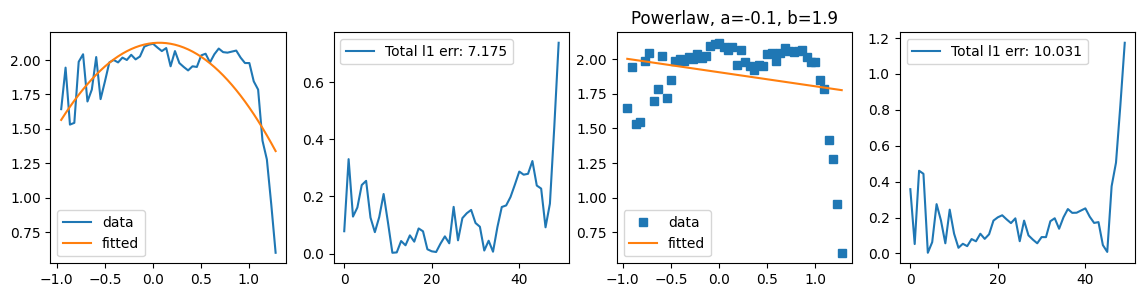

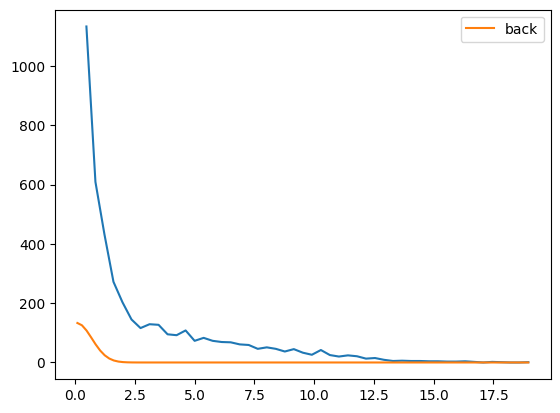

for tr91:
LinregressResult(slope=-0.21452487059459846, intercept=1.911641216035794, rvalue=-0.37229517437891424, pvalue=0.007758673621007468, stderr=0.07719179228462697, intercept_stderr=0.0560060526365653)


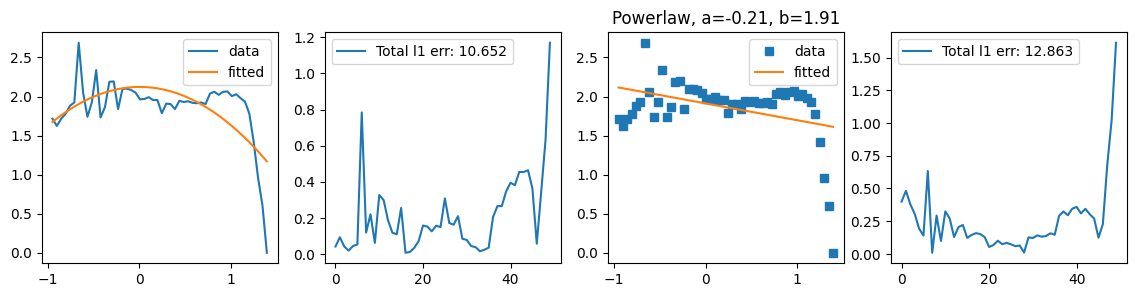

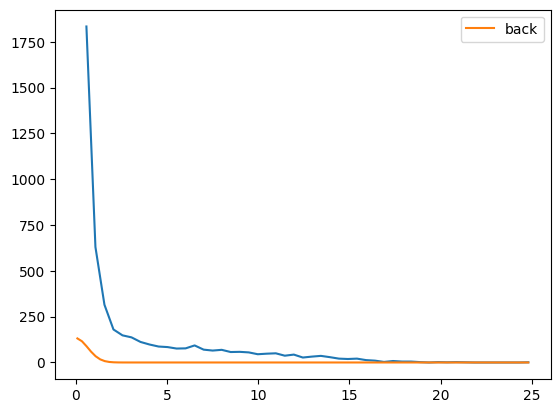

for tr92:
LinregressResult(slope=-0.4448524163004409, intercept=1.6508342475493119, rvalue=-0.6415738253237915, pvalue=5.152184648204801e-07, stderr=0.07676774181825954, intercept_stderr=0.05417880899250633)


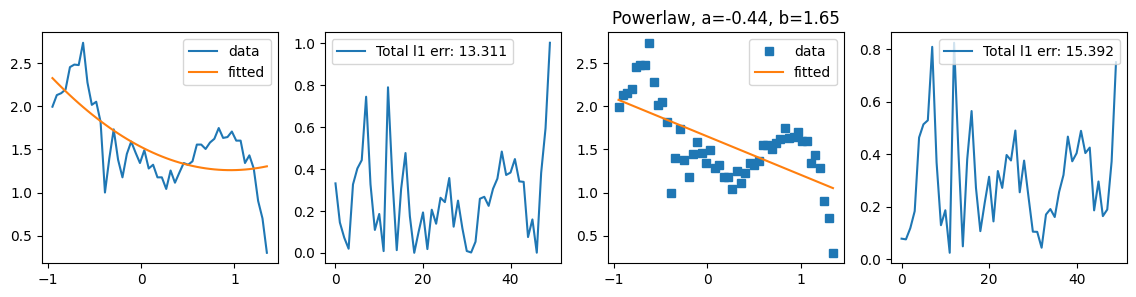

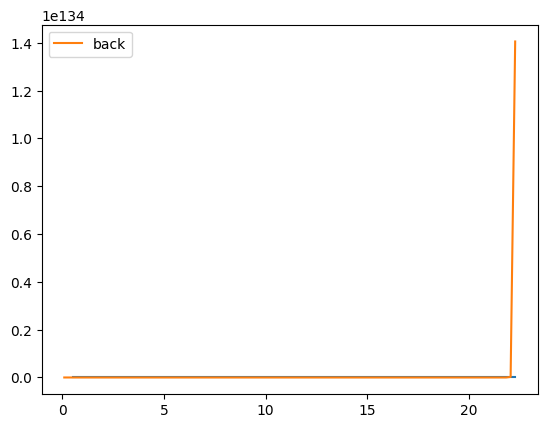

In [104]:
from scipy import stats

for k, df in df_steps_hist_log_log.items():
    x = df[1][1:]  # vals
    y = df[0]  # freqs
    print(f'for {k}:')

    # For polynom
    sol2 = curve_fit(parabola, x, y, p0=np.asarray([-0.5, 0., 0.]), maxfev=2000)  # maxfev=2000
    # print(sol2)
    params_poly = sol2[0]
    qq = parabola(x, *params_poly)

    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].plot(x, y, label='data')
    ax[0].plot(x, qq, label='fitted')
    # ax[0].set_title(f'Polynom fit, a={round(params[0], 2)}, b={round(params[1], 2)}')
    ax[0].legend()
    # Residuals
    res = np.abs(y - qq)
    ax[1].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[1].legend()

    # For linear regression 
    sol1 = curve_fit(linear, x, y, p0=np.asarray([1., 2.]))
    print(stats.linregress(x, y))
    params = sol1[0]
    qq = linear(x, params[0], params[1])

    ax[2].plot(x, y, label='data', marker='s', lw=0)
    ax[2].plot(x, qq, label='fitted')
    ax[2].set_title(f'Powerlaw, a={round(params[0], 2)}, b={round(params[1], 2)}')
    ax[2].legend()
    # ax[2].ylim([])
    # Residuals
    res = np.abs(y - qq)
    ax[3].plot(res, label=f'Total l1 err: {round(np.sum(res), 3)}')
    ax[3].legend()

    plt.show()

    ### Transfer back from log-log
    h_linear, bins_linear = df_steps_hist[k]
    x_linear_grid = np.linspace(bins_linear.min(), bins_linear.max(), 100)
    
    plt.plot(bins_linear[1:], h_linear)
    # plt.show()

    ## Linear
    # a, b = params[0], params[1]
    # h_linear_grid = 10**(b + a * x_linear_grid)

    ## Parabola
    h_linear_grid = 10**parabola(x_linear_grid, *params_poly)

    # qq_norm = 10**(b + a * x)
    plt.plot(x_linear_grid, h_linear_grid, label='back')
    plt.legend()
    plt.show()


    # break

    # 1. x, y => ln(x), ln(y)
    # 2. params = curve_fit(ln(x), ln(y))
    #    y = a*x**b => ln(y) = ln(a) + b * ln(x)
    # 3. => y = exp(ln(a) + b * ln(x))
    # PROFIT

### Check Goodness-of-fit

In [ ]:
# TODO add estimation of fitting A


# TODO: it is better to fit in log coords 
# since least squares badly fit small values wrt big values
# min of squares of error is reased with fitting big values 

# 1. x, y => ln(x), ln(y)
# 2. params = curve_fit(ln(x), ln(y))
#    y = a*x**b => ln(y) = ln(a) + b * ln(x)
# 3. => y = exp(ln(a) + b * ln(x))
# PROFIT

## проведем анализ 0.5 с центр

In [11]:
#удалим тр 92  # TODO: why? maybe just cut 
# del dfs[6]

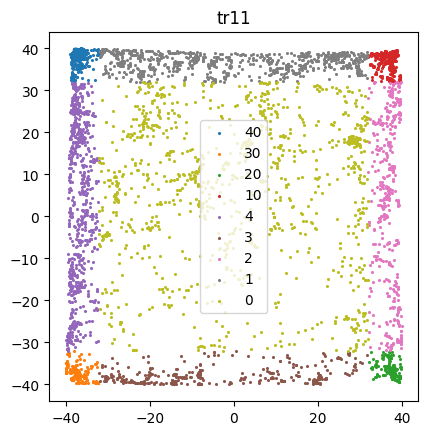

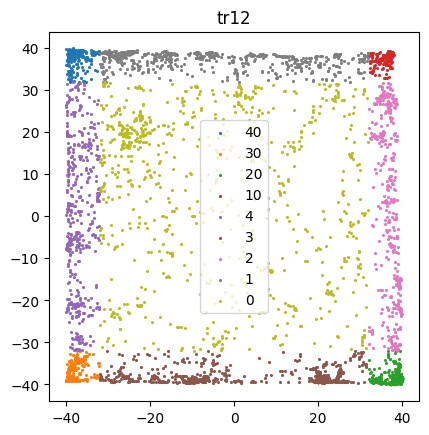

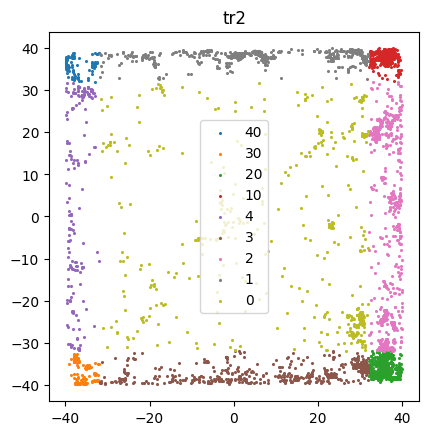

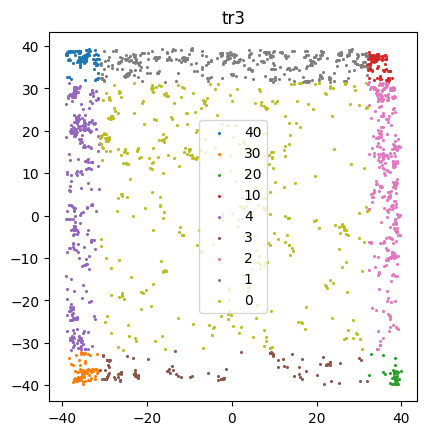

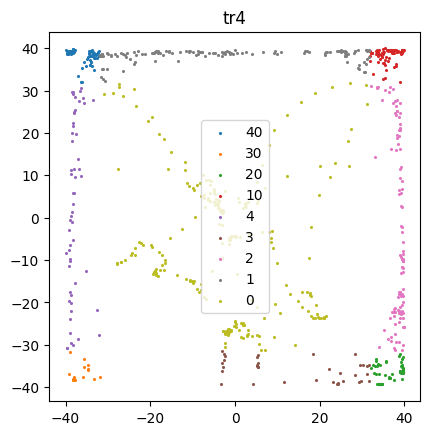

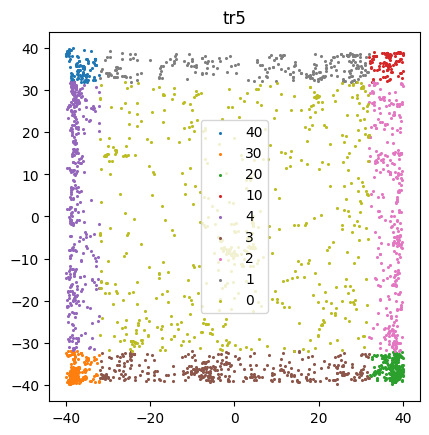

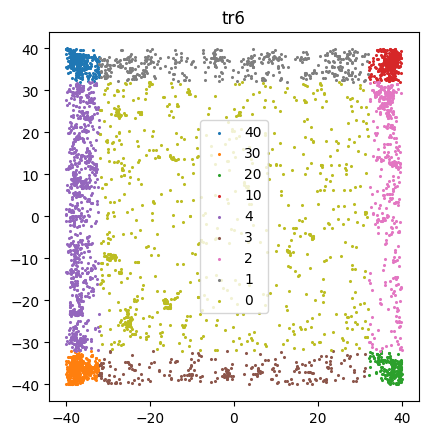

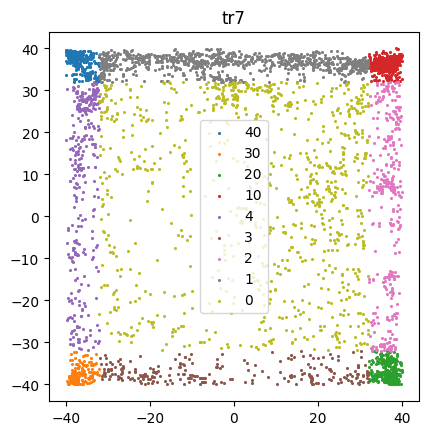

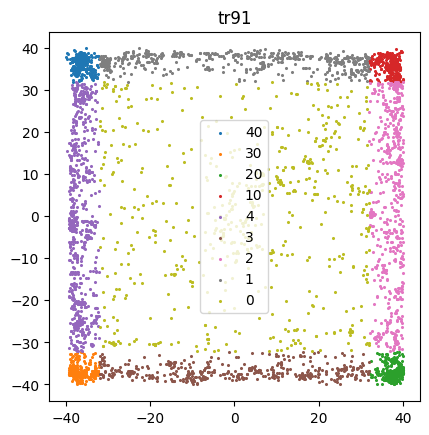

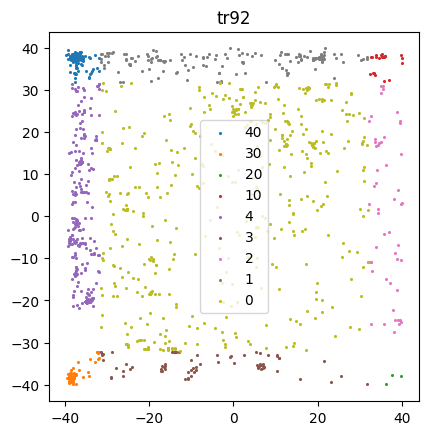

In [13]:
from utils.processing import sort_walls_area
from utils.plotting import plot_wall_sorted_samples

df_dict_areas = {}
for k, df in df_dict.items():
    df_areas = sort_walls_area(df, wall_percent=0.1)
    df_dict_areas[k] = df_areas
    plot_wall_sorted_samples(df_areas, k)

tr11 0.0


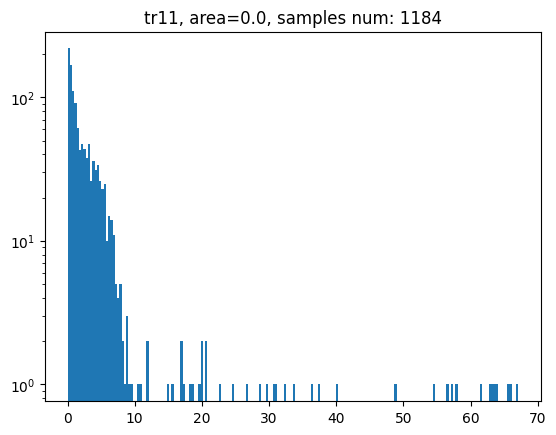

tr11 1.0


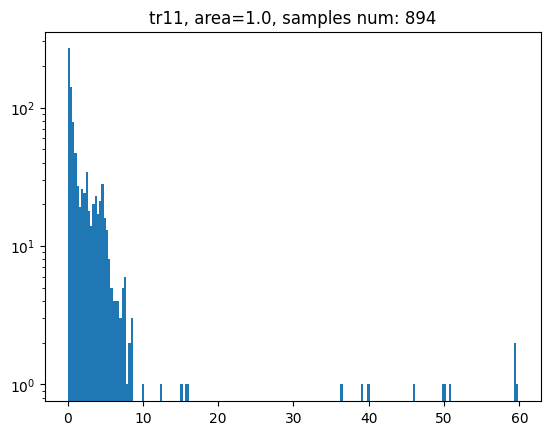

tr11 2.0


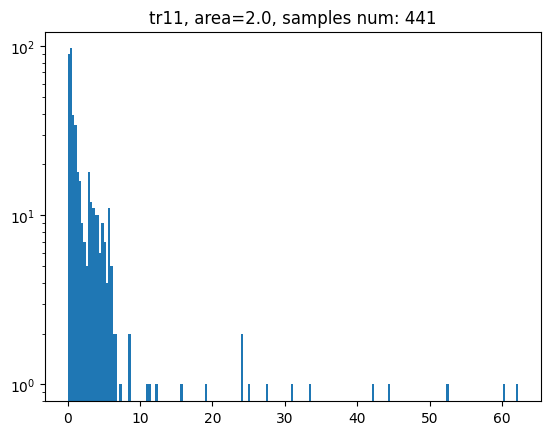

tr11 3.0


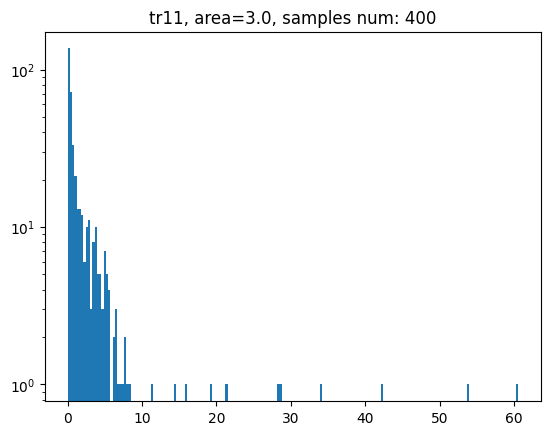

tr11 4.0


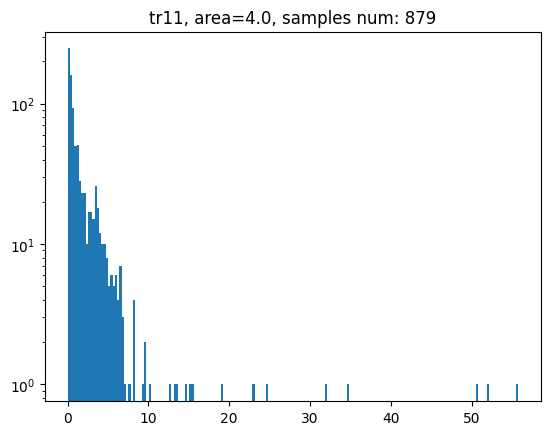

tr11 10.0


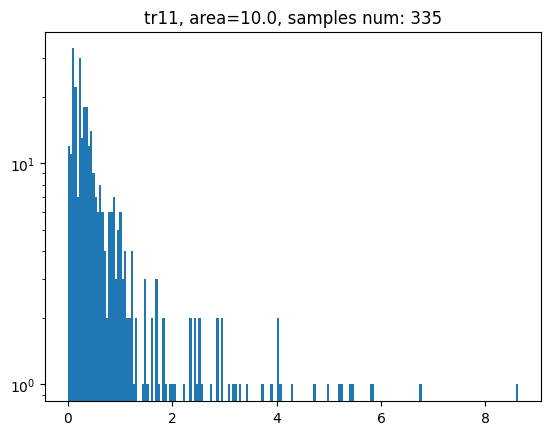

tr11 20.0


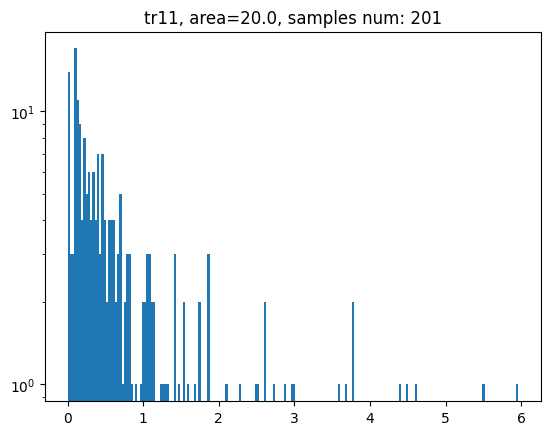

tr11 30.0


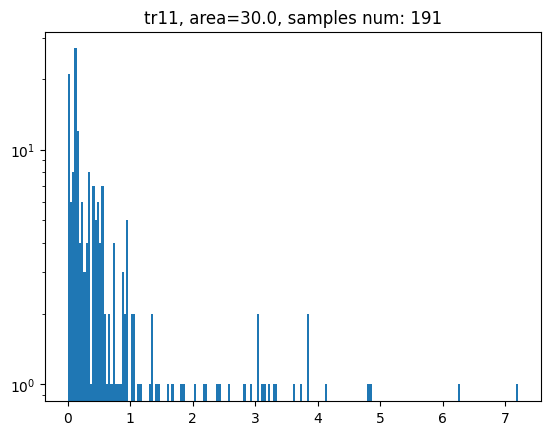

tr11 40


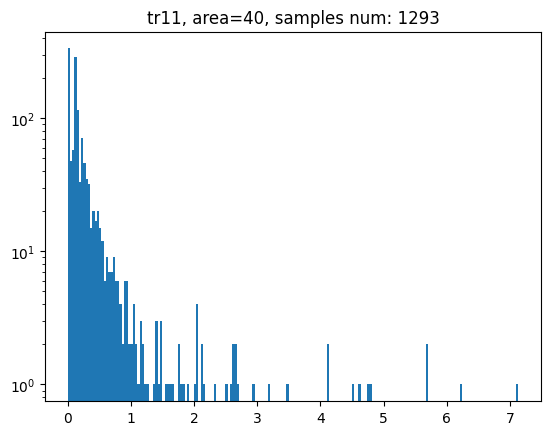

tr12 0.0


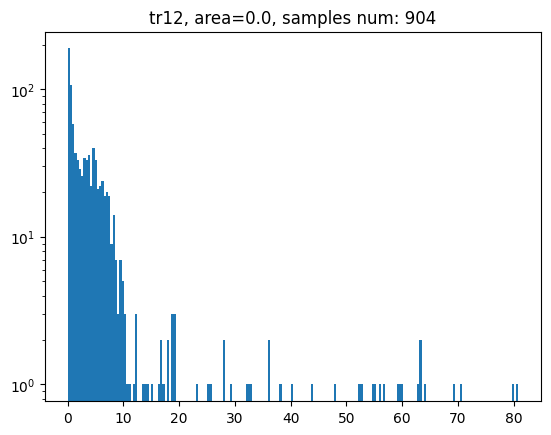

tr12 1.0


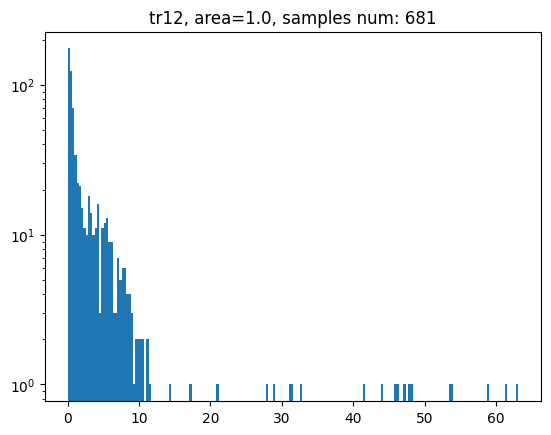

tr12 2.0


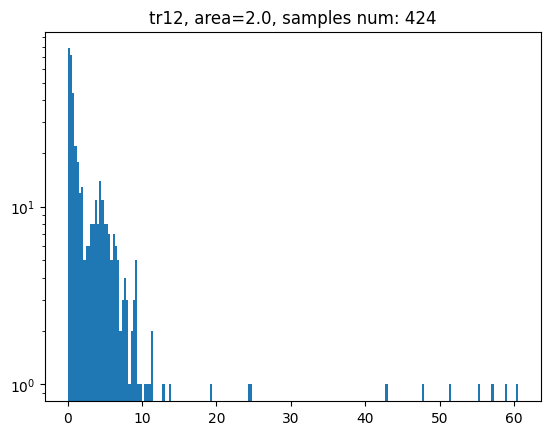

tr12 3.0


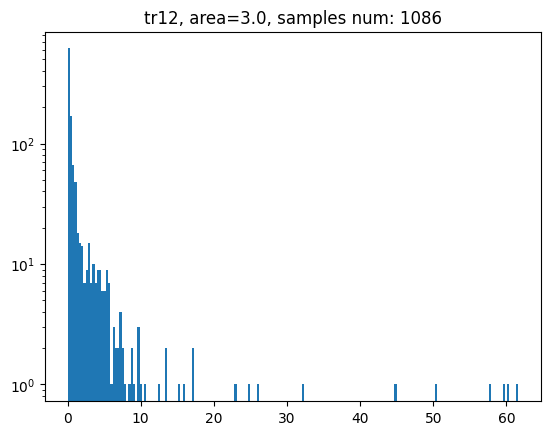

tr12 4.0


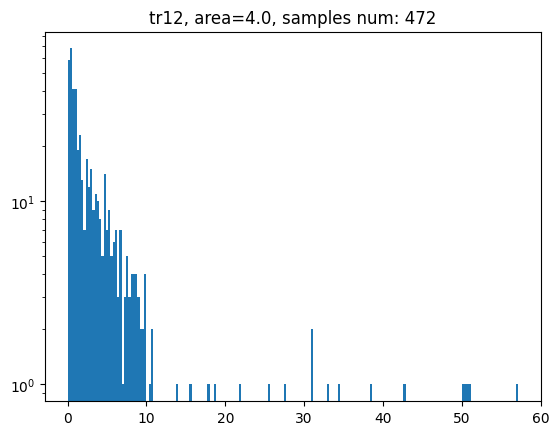

tr12 10.0


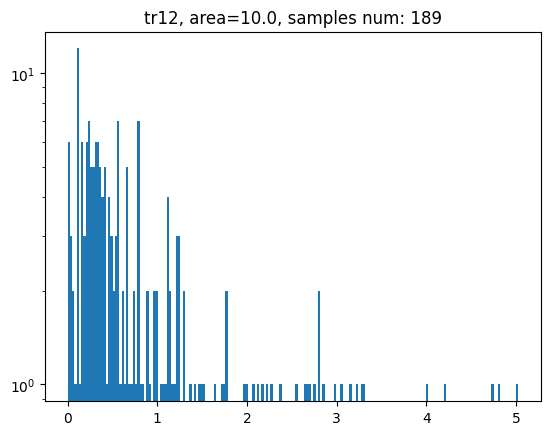

tr12 20.0


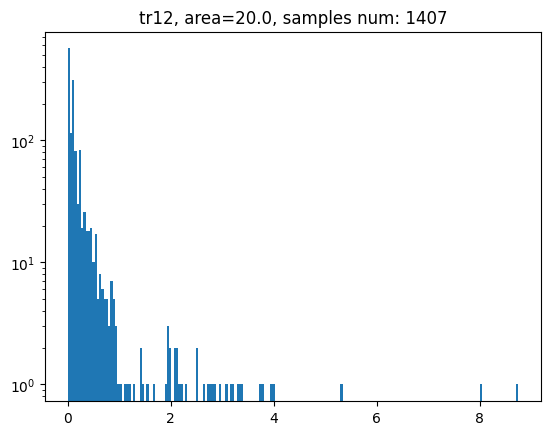

tr12 30.0


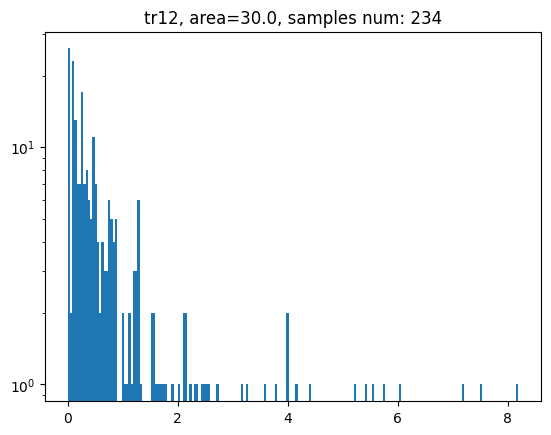

tr12 40


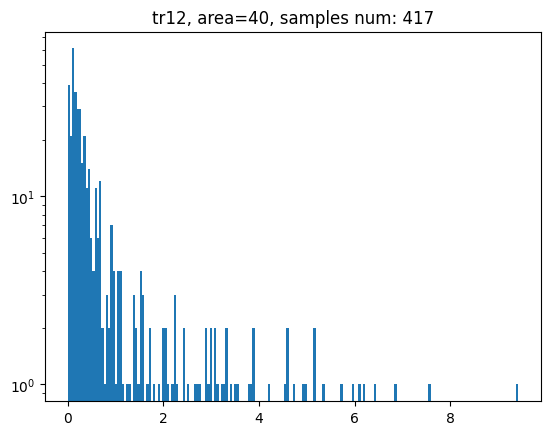

tr2 0.0


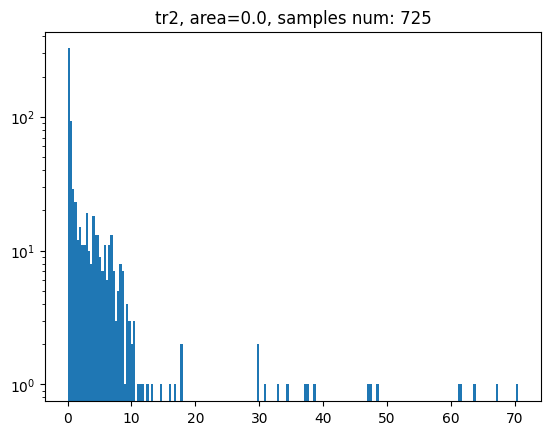

tr2 1.0


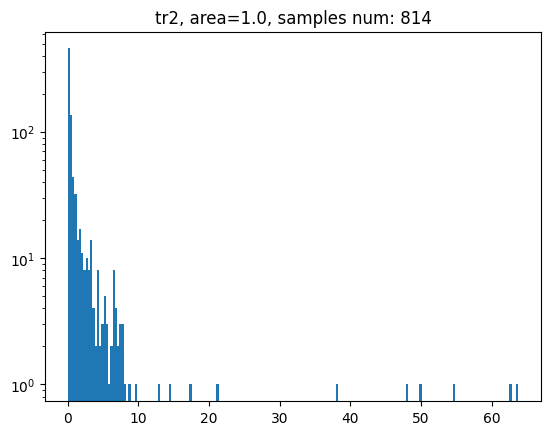

tr2 2.0


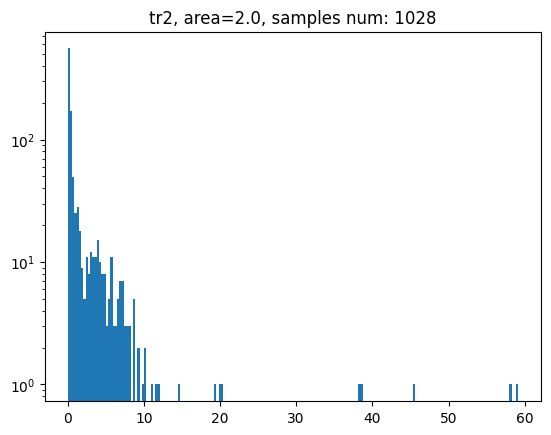

tr2 3.0


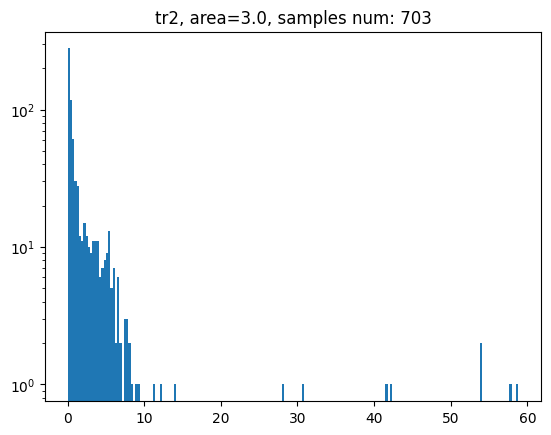

tr2 4.0


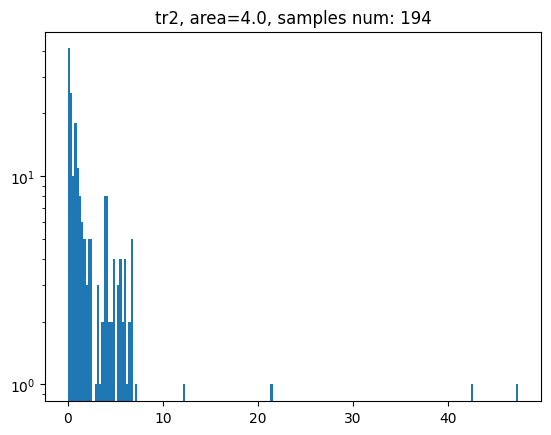

tr2 10.0


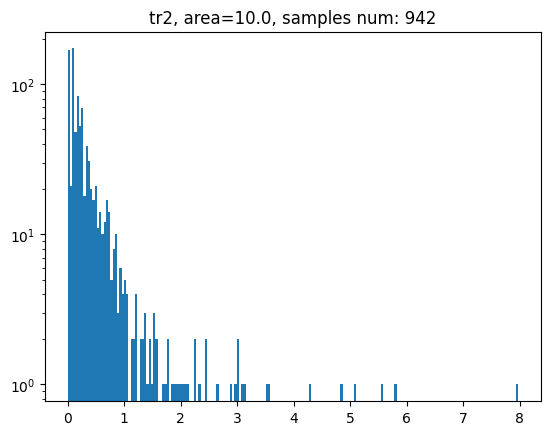

tr2 20.0


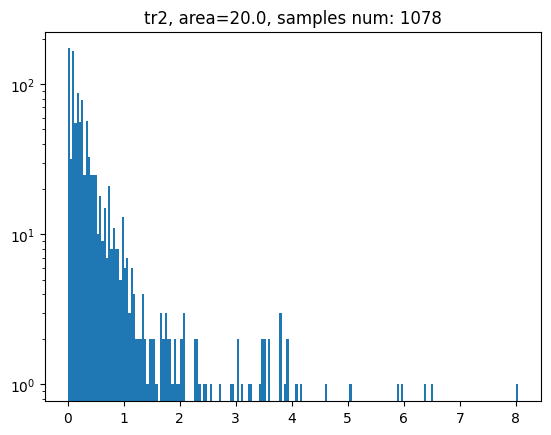

tr2 30.0


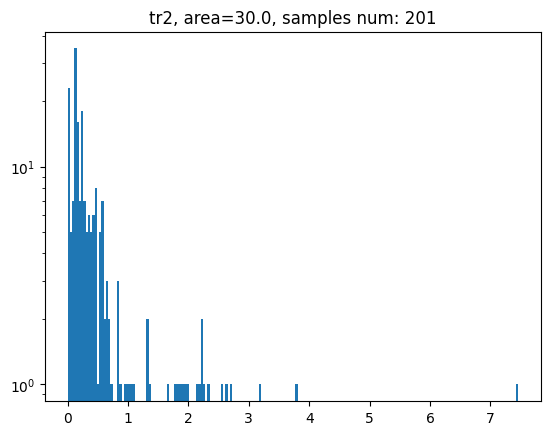

tr2 40


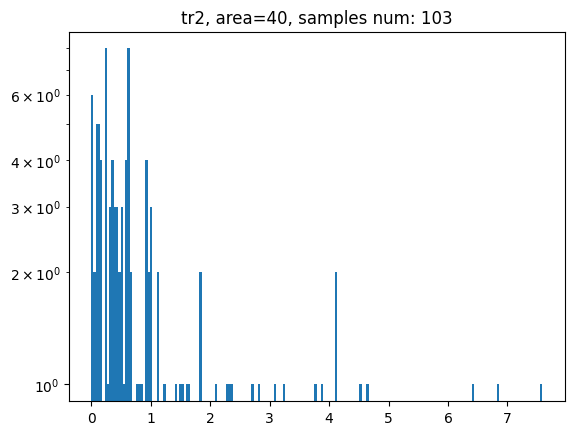

tr3 0.0


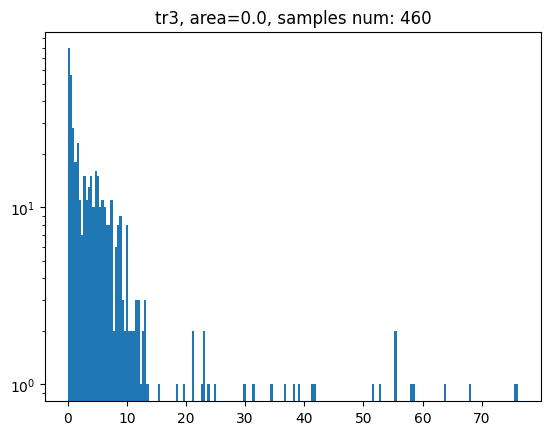

tr3 1.0


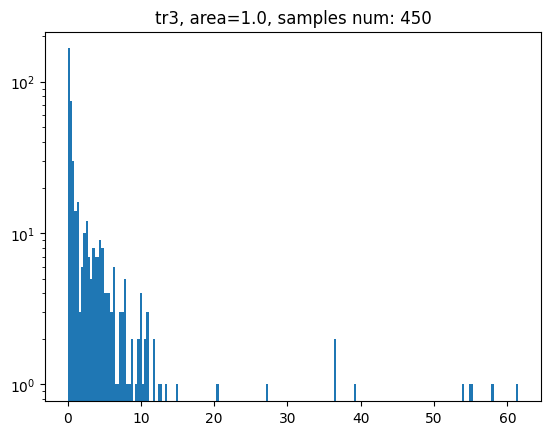

tr3 2.0


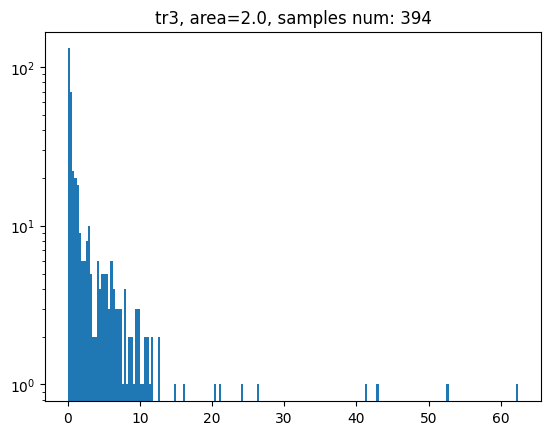

tr3 3.0


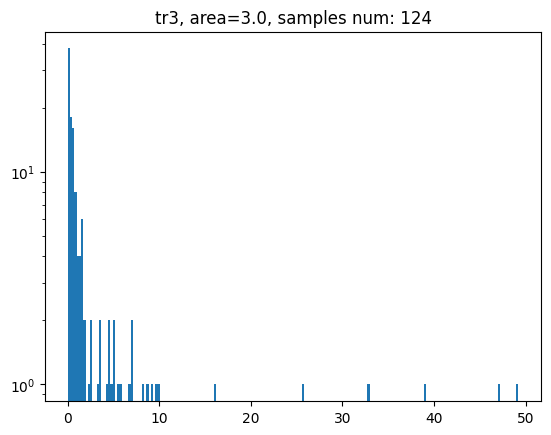

tr3 4.0


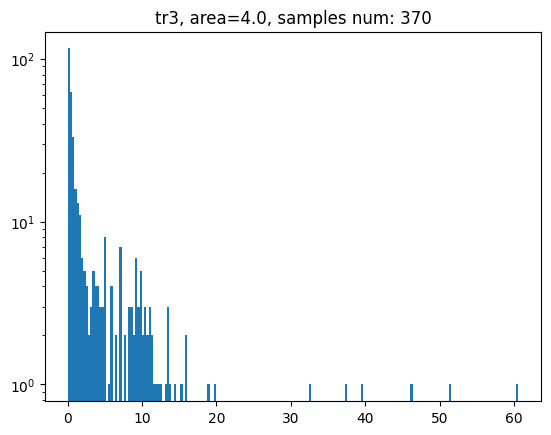

tr3 10.0


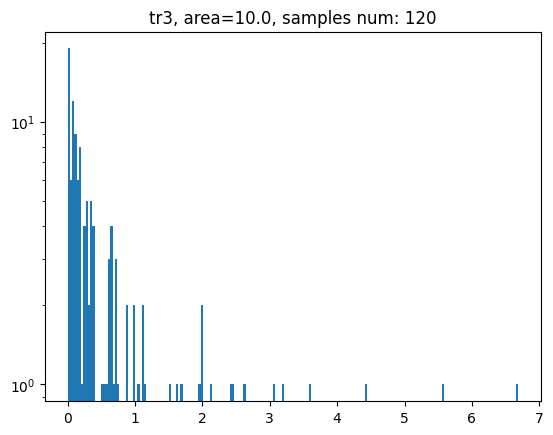

tr3 20.0


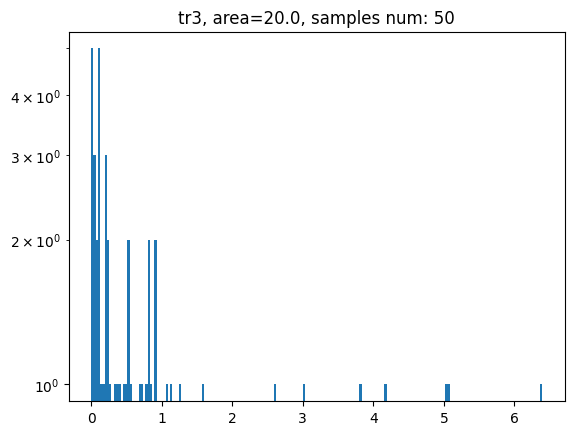

tr3 30.0


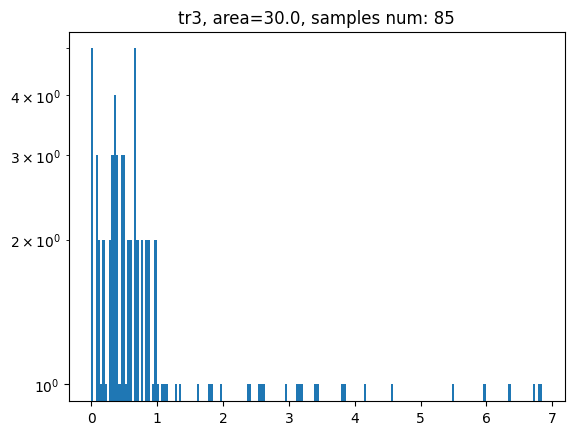

tr3 40


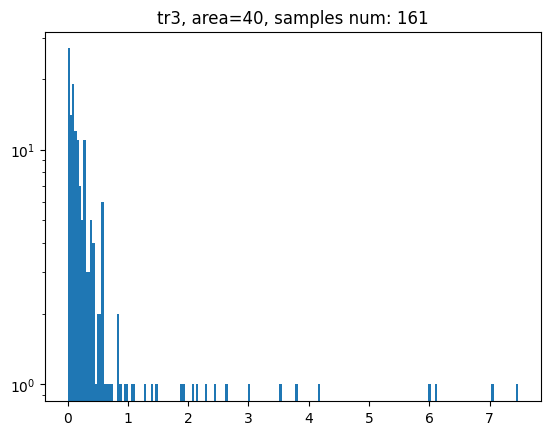

tr4 0.0


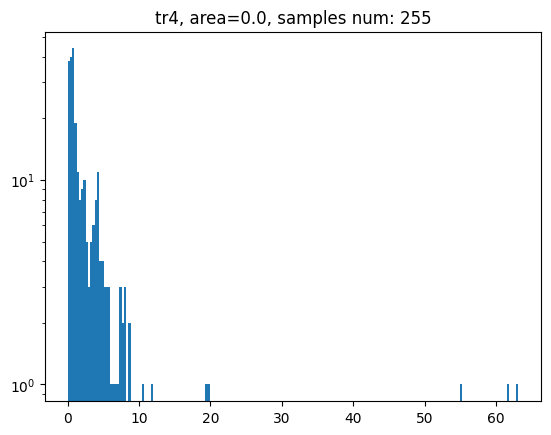

tr4 1.0


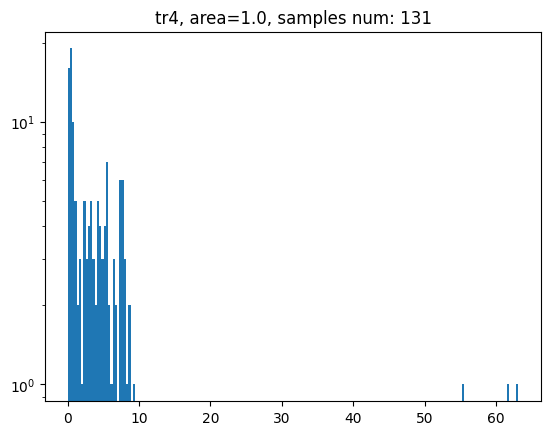

tr4 2.0


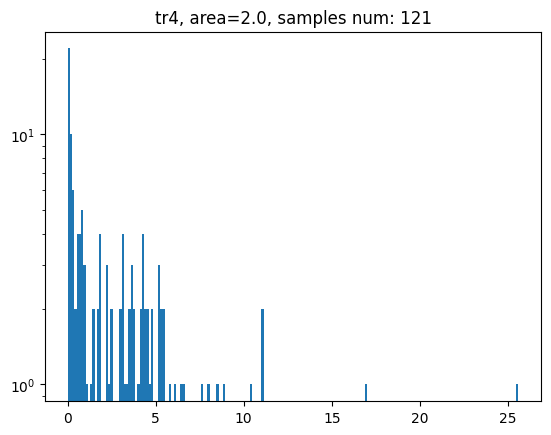

tr4 3.0


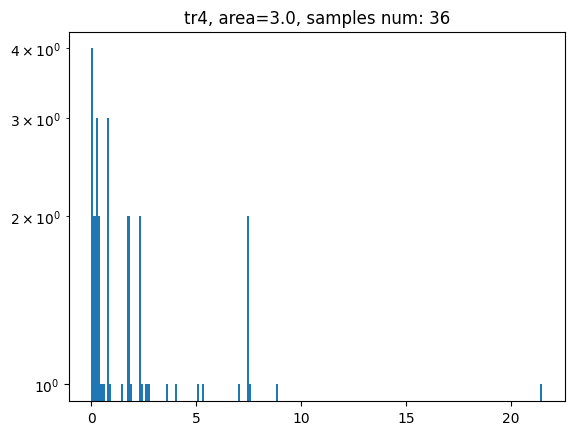

tr4 4.0


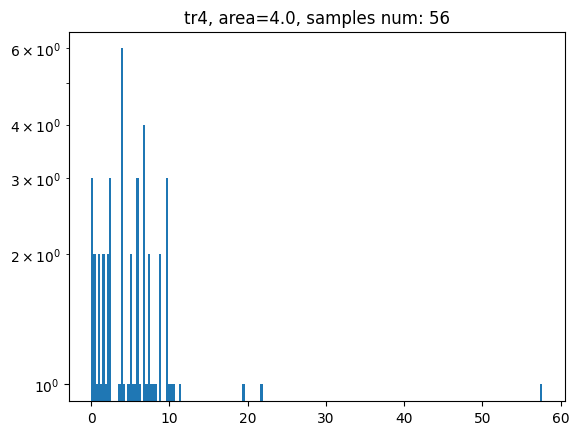

tr4 10.0


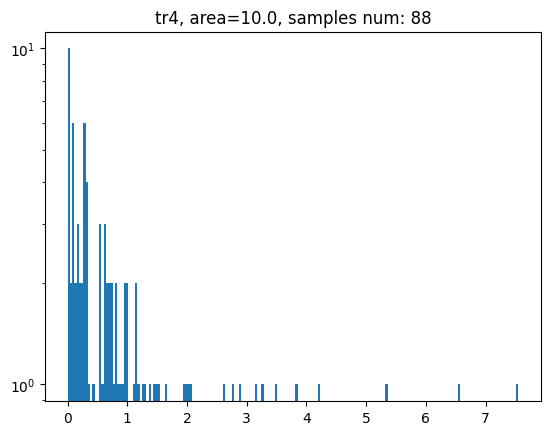

tr4 20.0


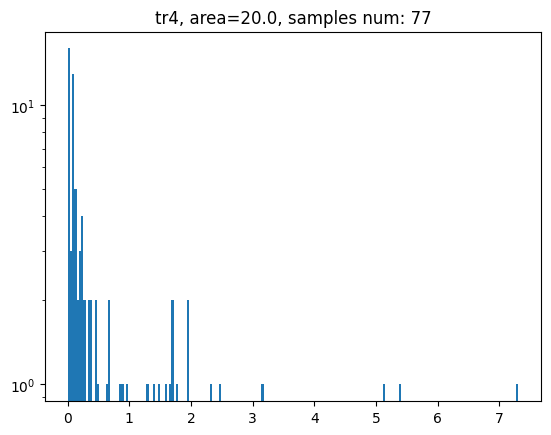

tr4 30.0


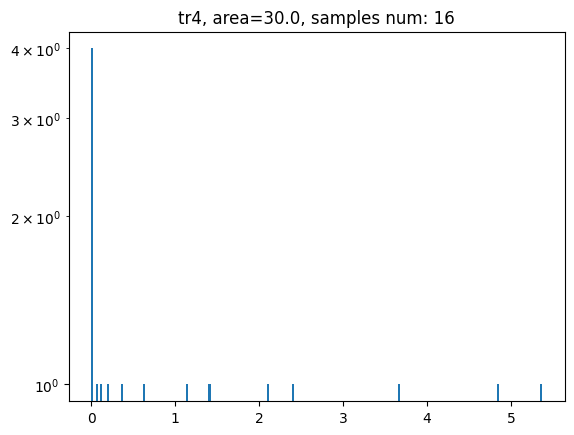

tr4 40


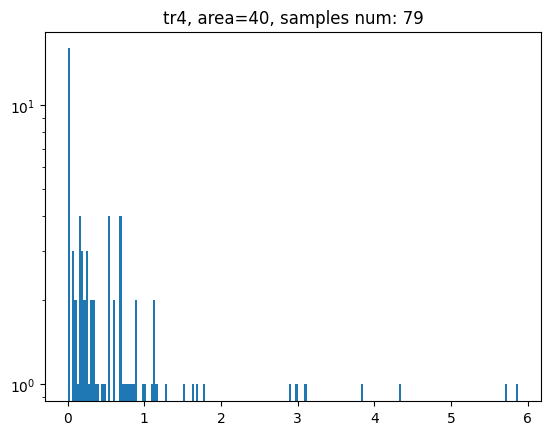

tr5 0.0


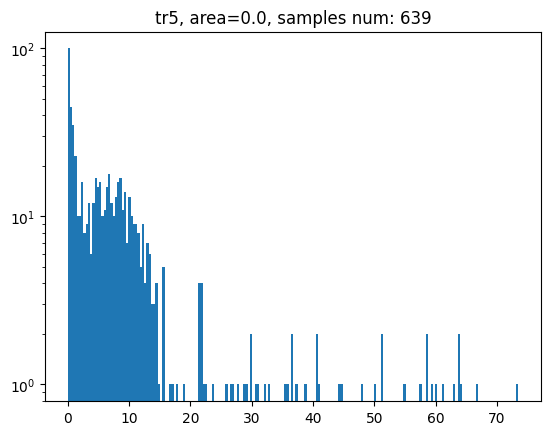

tr5 1.0


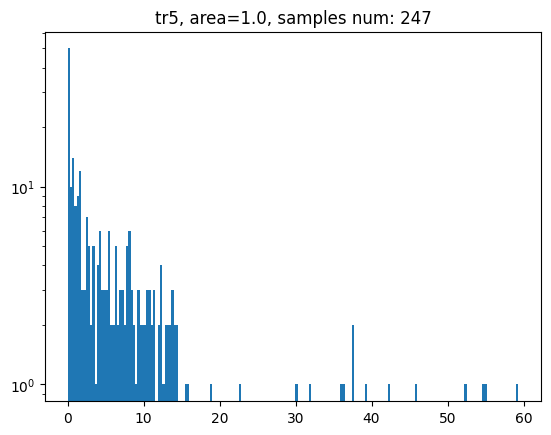

tr5 2.0


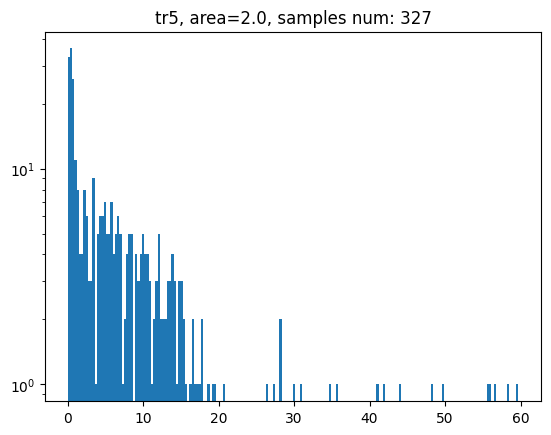

tr5 3.0


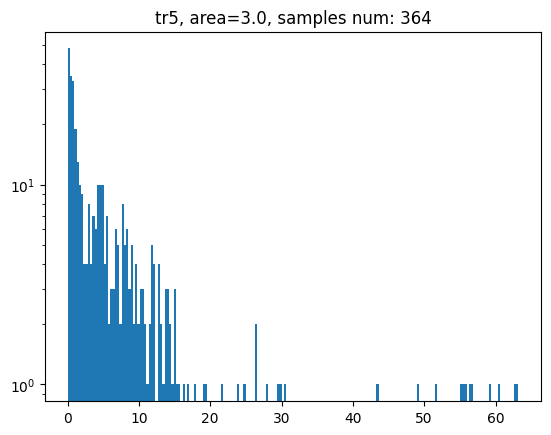

tr5 4.0


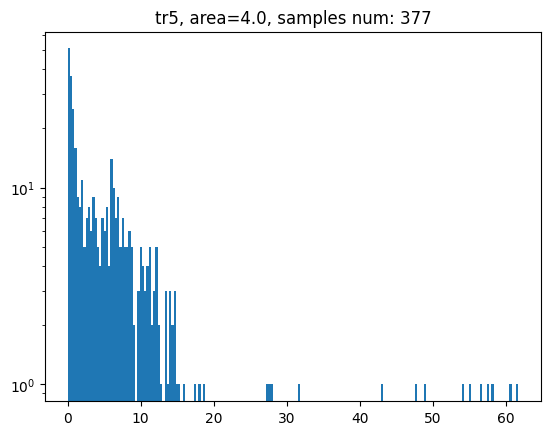

tr5 10.0


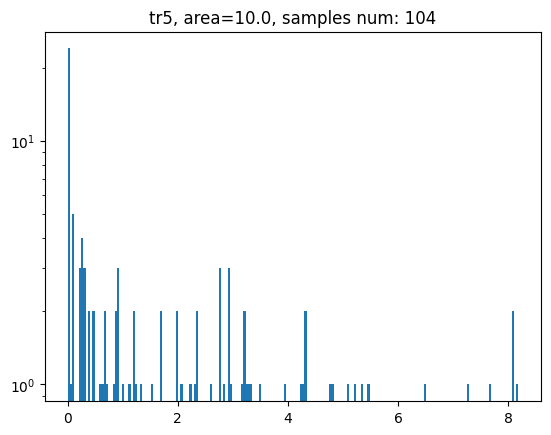

tr5 20.0


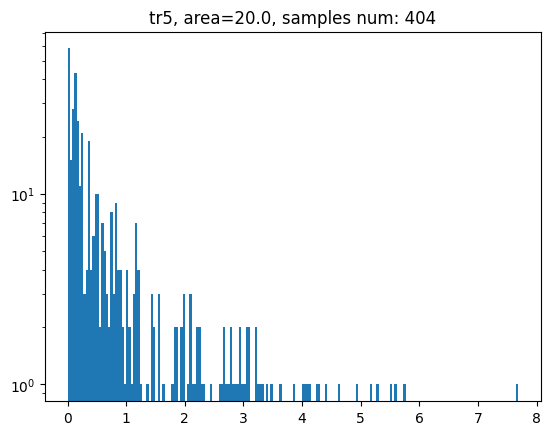

tr5 30.0


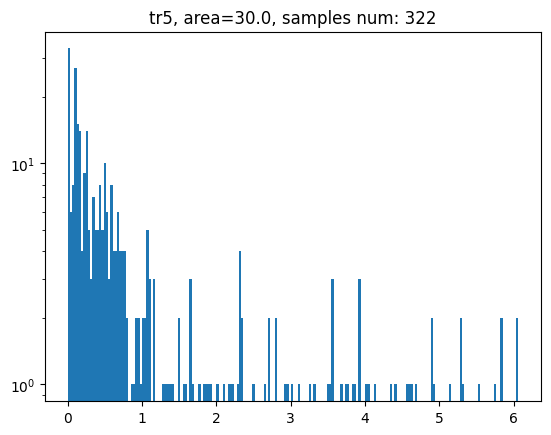

tr5 40


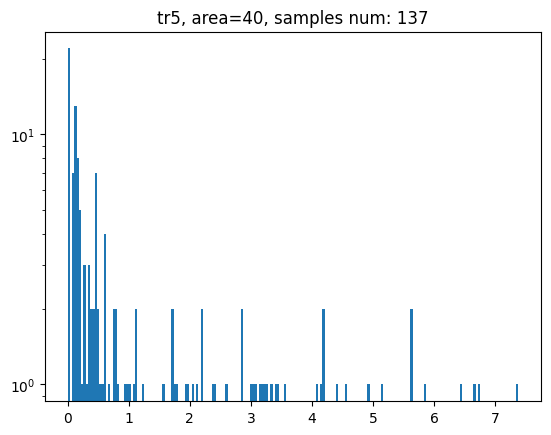

tr6 0.0


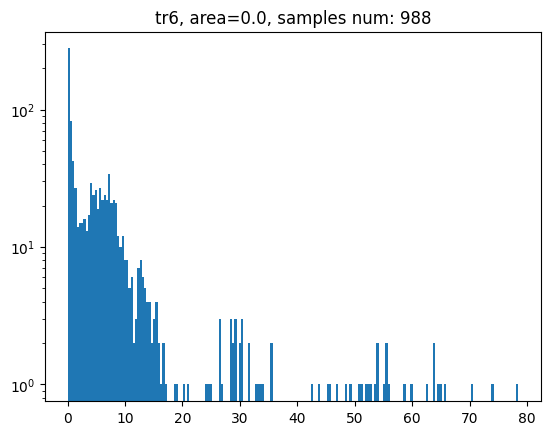

tr6 1.0


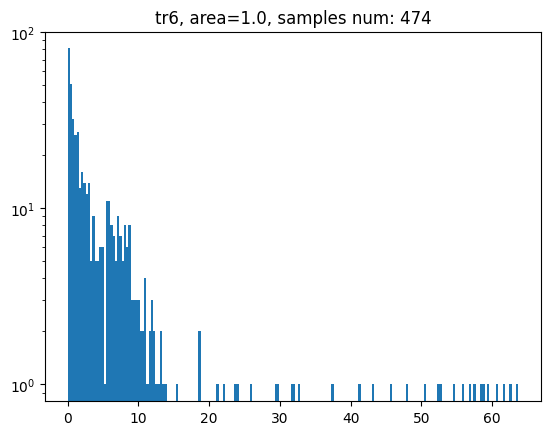

tr6 2.0


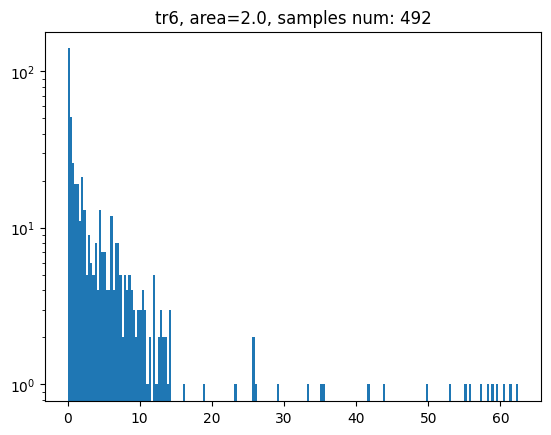

tr6 3.0


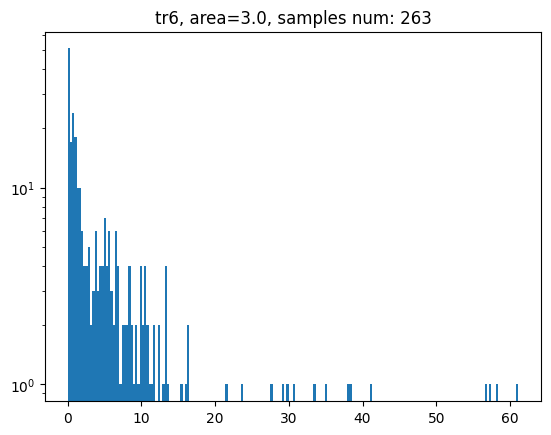

tr6 4.0


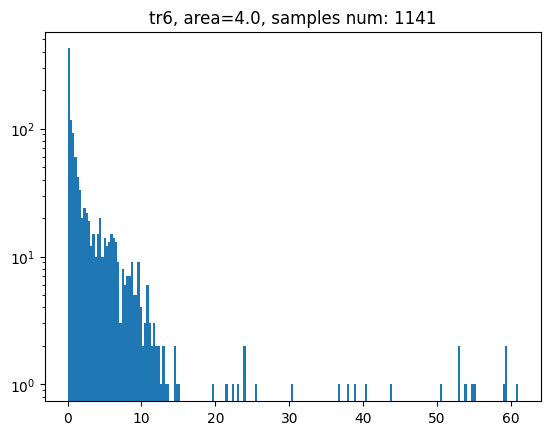

tr6 10.0


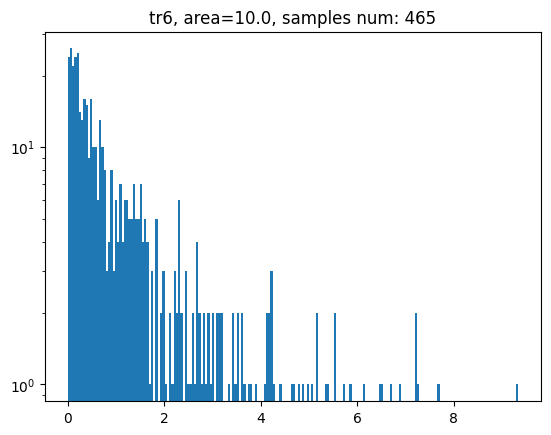

tr6 20.0


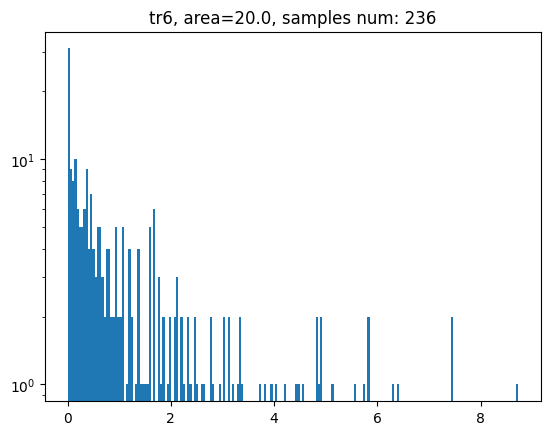

tr6 30.0


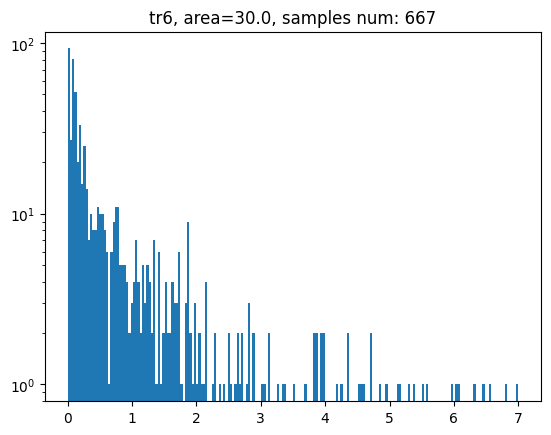

tr6 40


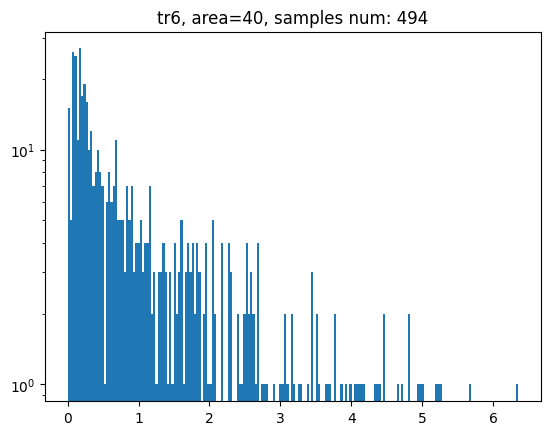

tr7 0.0


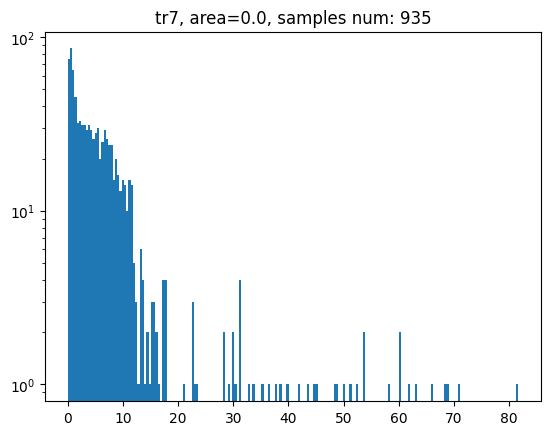

tr7 1.0


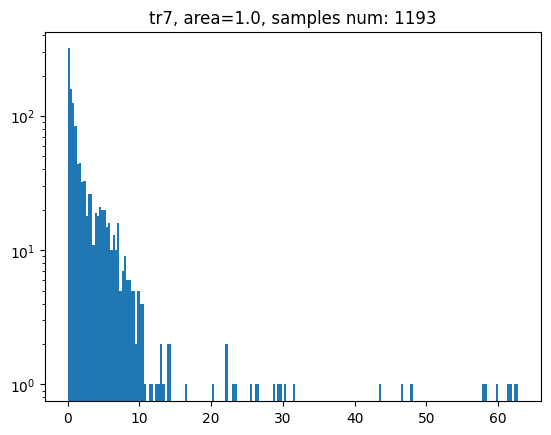

tr7 2.0


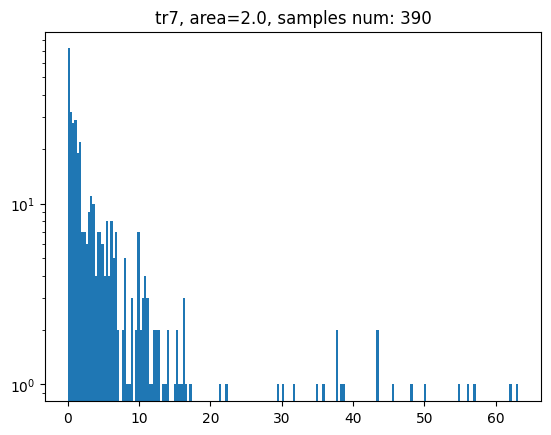

tr7 3.0


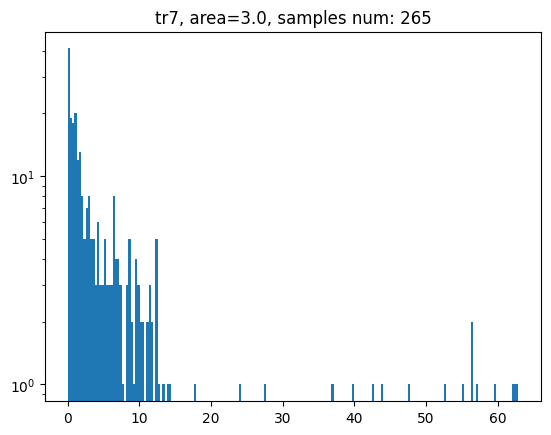

tr7 4.0


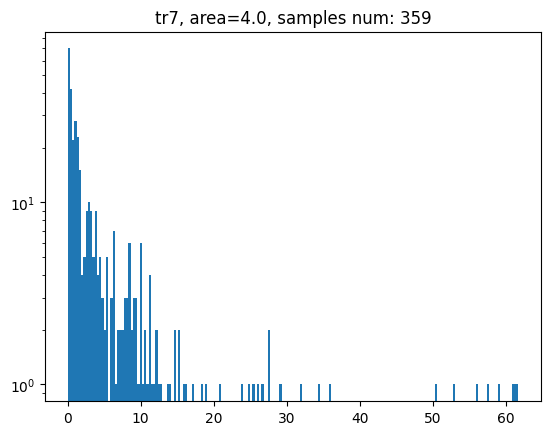

tr7 10.0


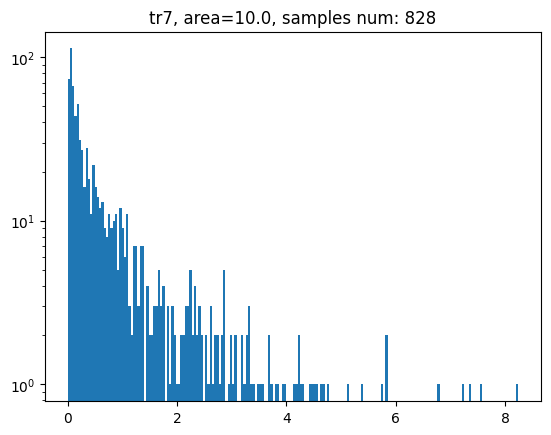

tr7 20.0


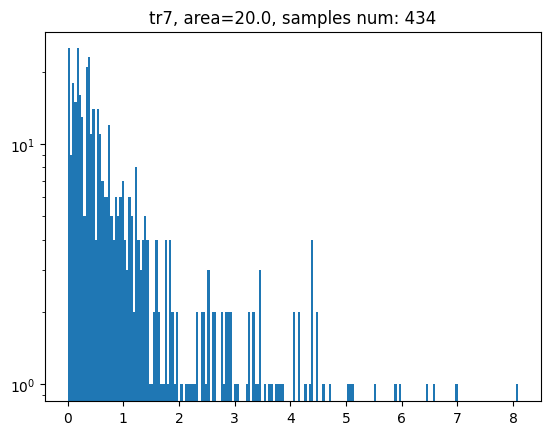

tr7 30.0


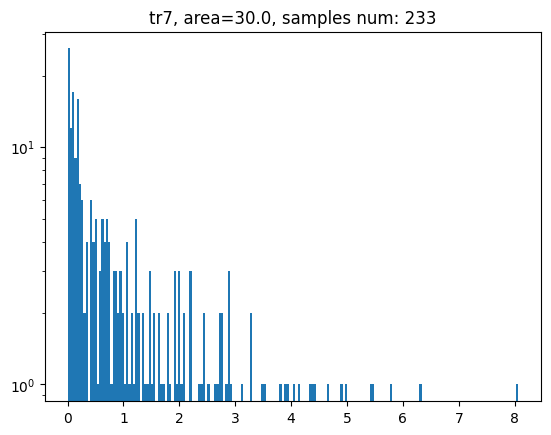

tr7 40


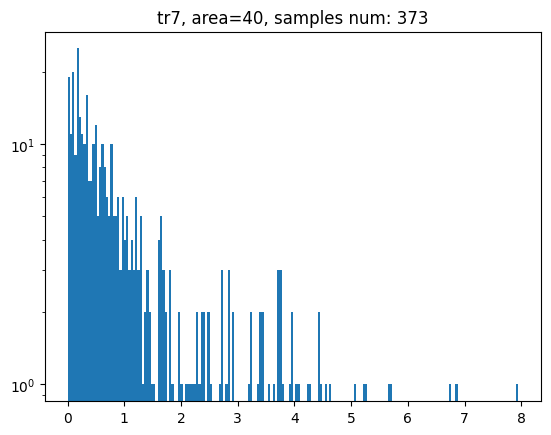

tr91 0.0


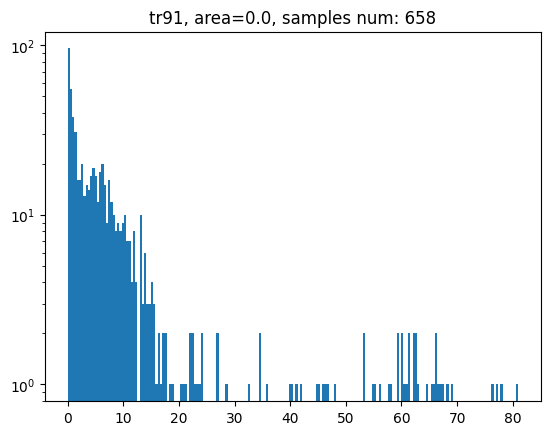

tr91 1.0


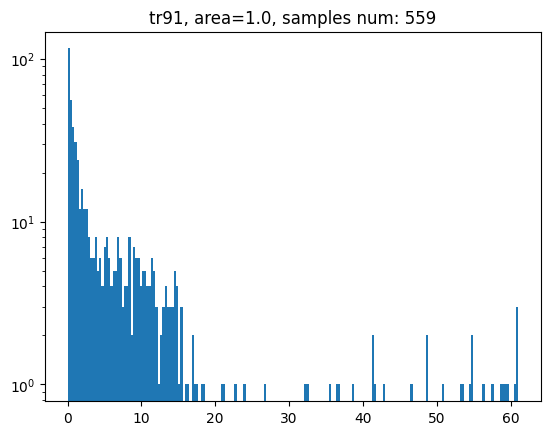

tr91 2.0


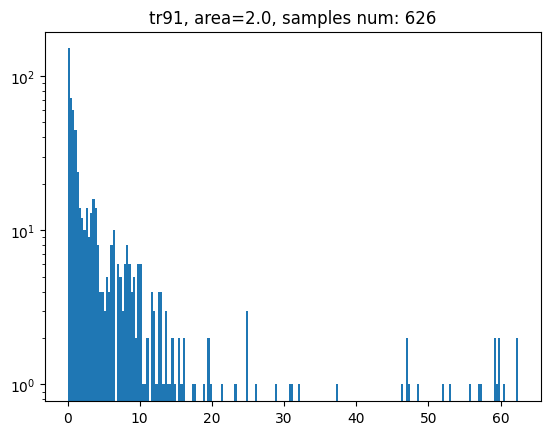

tr91 3.0


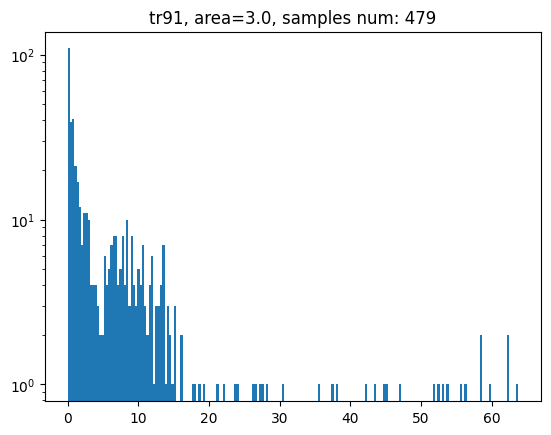

tr91 4.0


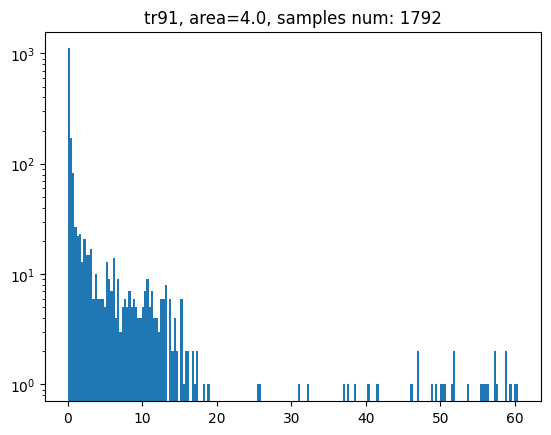

tr91 10.0


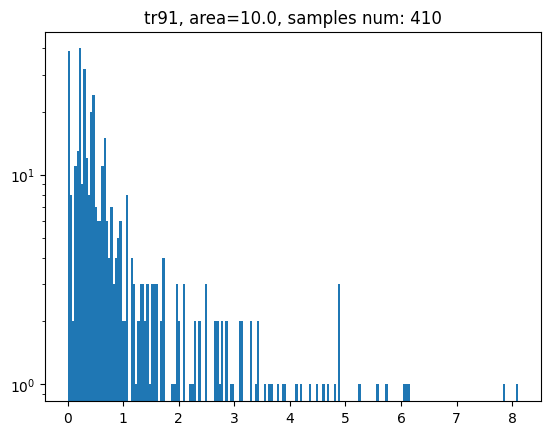

tr91 20.0


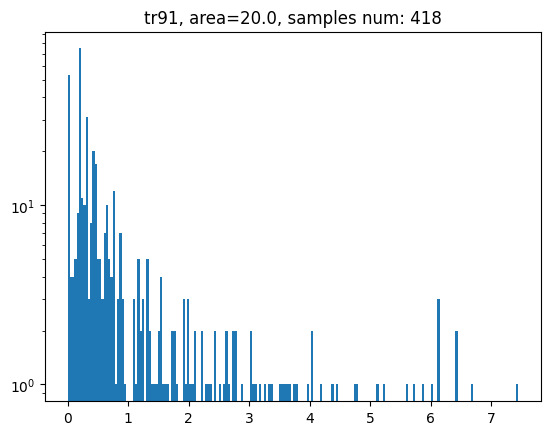

tr91 30.0


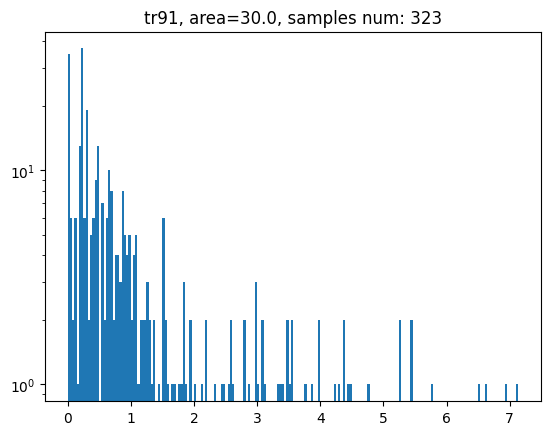

tr91 40


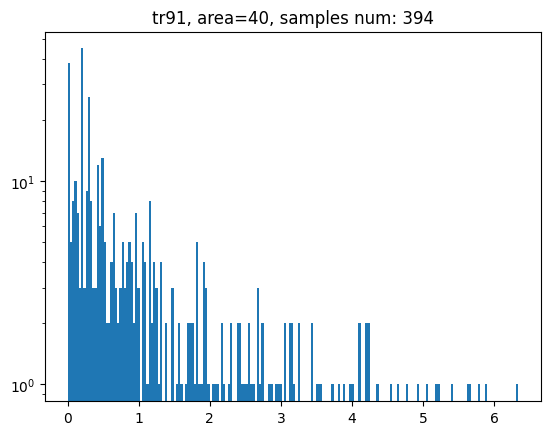

tr92 0.0


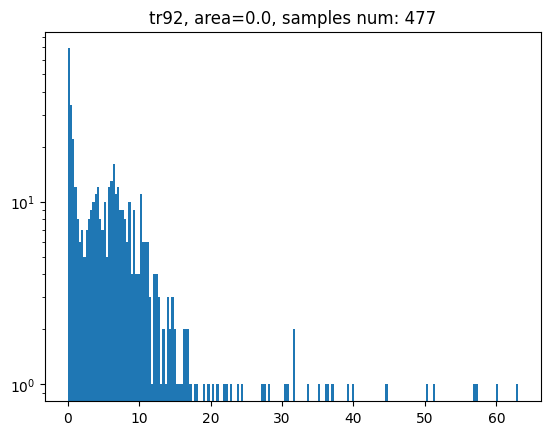

tr92 1.0


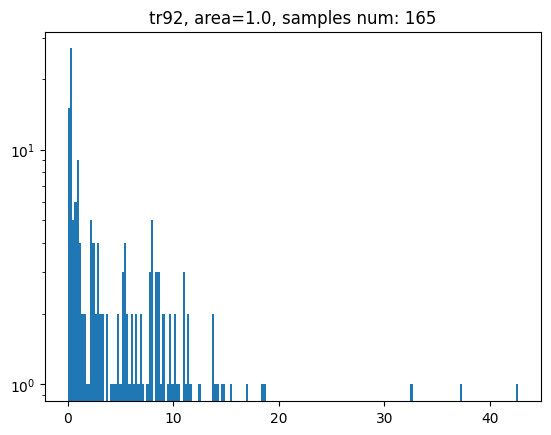

tr92 2.0


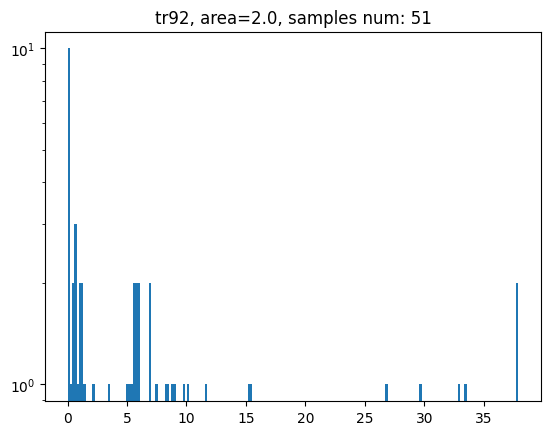

tr92 3.0


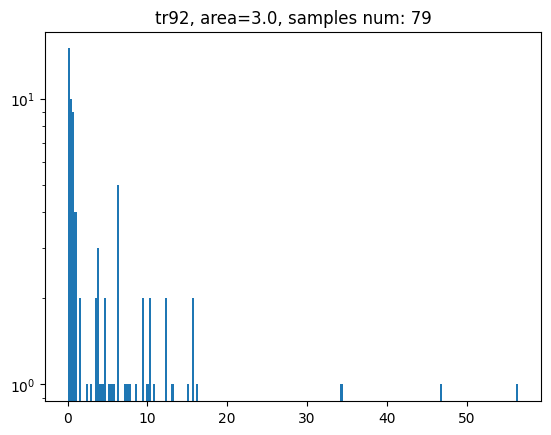

tr92 4.0


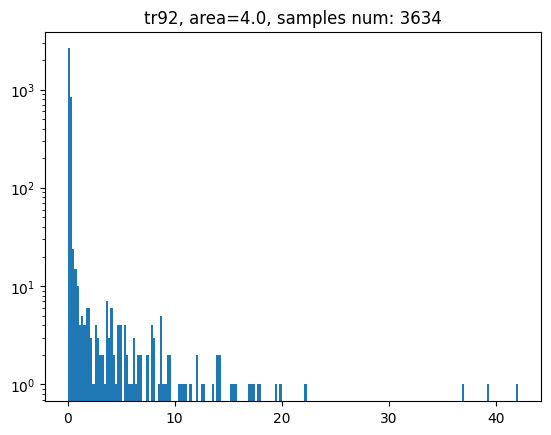

tr92 10.0


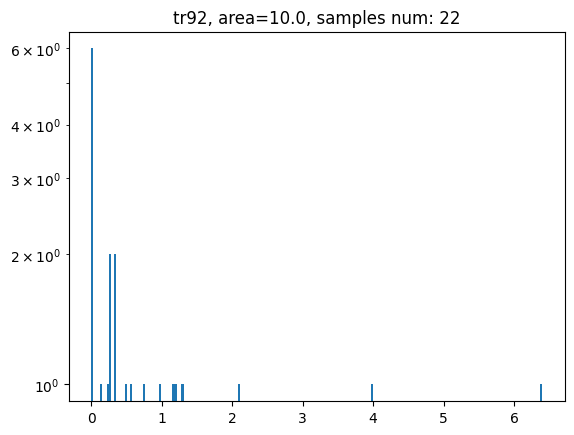

tr92 20.0


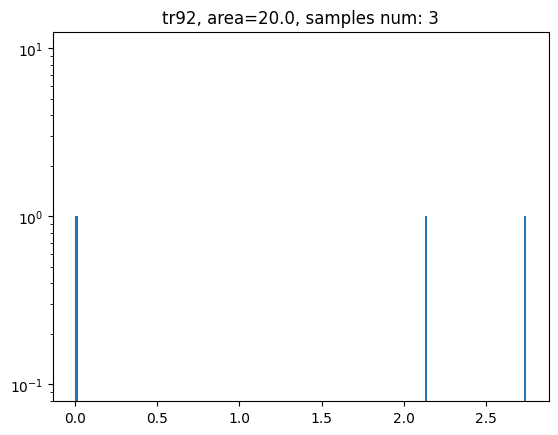

tr92 30.0


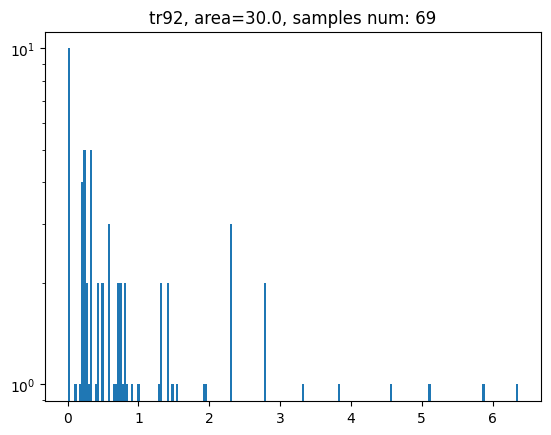

tr92 40


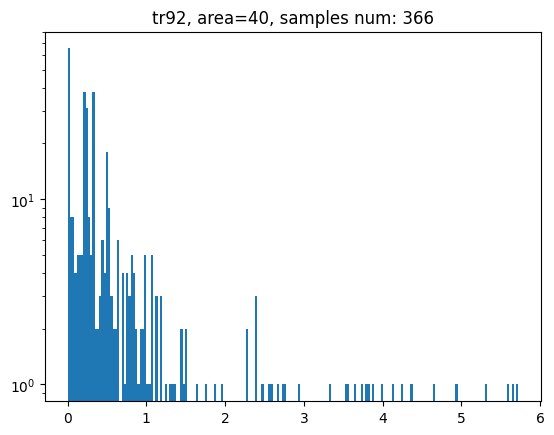

In [14]:
df_steps_hist = {}
for k, df in df_dict.items():

    for area in [0., 1., 2., 3., 4., 10., 20., 30., 40]:
        print(k, area)
        df_in_area = df.loc[df['near_wall']==area].copy()
        h = build_log_hist(df_in_area, binn=200, hist_title=f'{k}, area={area}')
        df_steps_hist[k] = h
        # break
    # break
    # TODO: what is the name of x-axis ??? len of area len units ???
    # TODO: threshold for dropping "sitting" column
    # TODO: но я в итоге убираю первую колонку ???

In [18]:
df_params = []
for k, df in df_steps_hist.items():
    x = df[1][1:]  # vals
    y = df[0]      # freqs

    sol = curve_fit(power_law, x, y, p0 = np.asarray([1., 10**5]))
    df_params.append(sol[0])
    print(f'For {k}: m = {round(sol[0][0], 3)}, c = {round(sol[0][1], 3)}')

For tr11: m = -1.037, c = 10.063
For tr12: m = -0.772, c = 5.177
For tr2: m = -0.631, c = 0.952
For tr3: m = -0.911, c = 1.501
For tr4: m = -1.095, c = 0.285
For tr5: m = -0.917, c = 0.94
For tr6: m = -0.56, c = 3.939
For tr7: m = -0.625, c = 3.561
For tr91: m = -0.7, c = 2.927
For tr92: m = -0.924, c = 2.031


## проведем анализ углы

tr11 (2020, 8)


/tmp/ipykernel_13213/2113354128.py:24: RuntimeWarning: divide by zero encountered in log10
  hist = np.log10(hist)


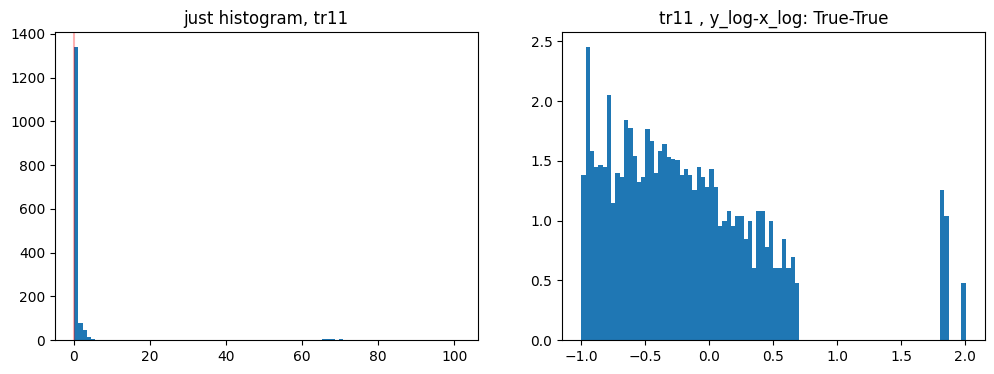

tr12 (2247, 8)


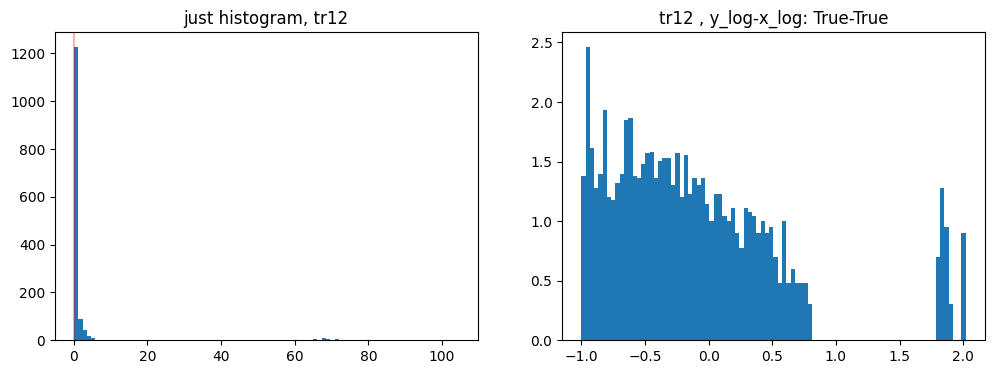

tr2 (2324, 8)


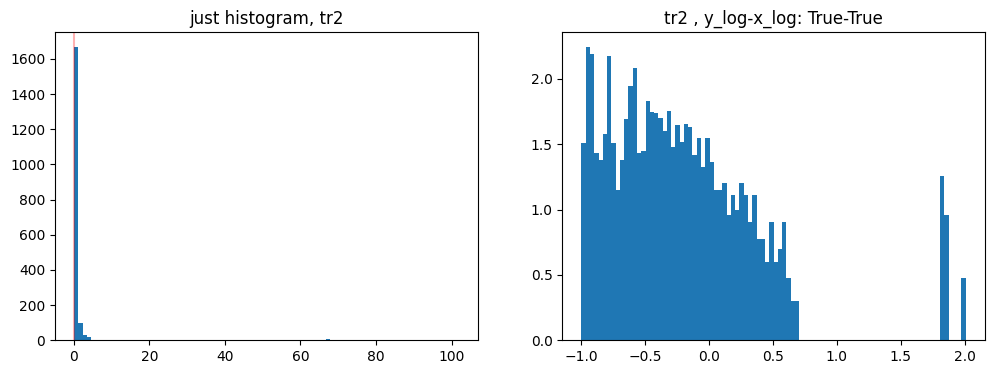

tr3 (416, 8)


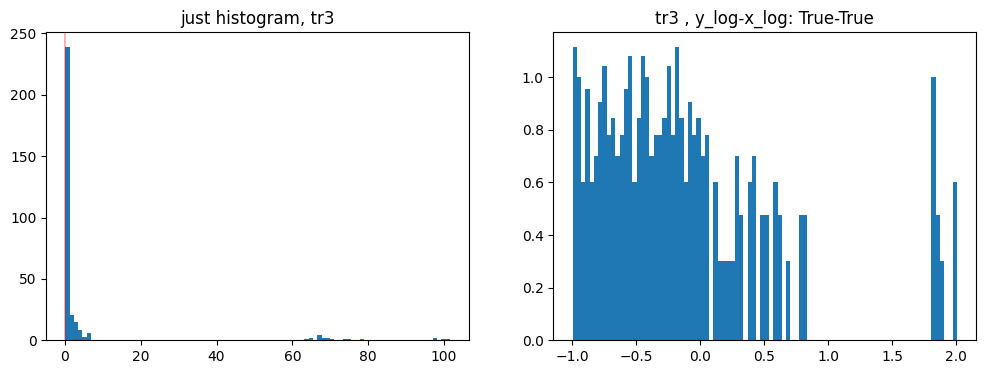

tr4 (260, 8)


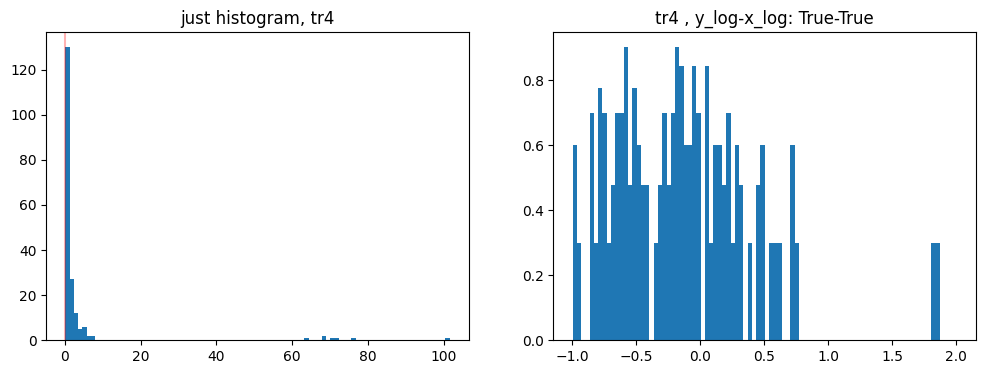

tr5 (967, 8)


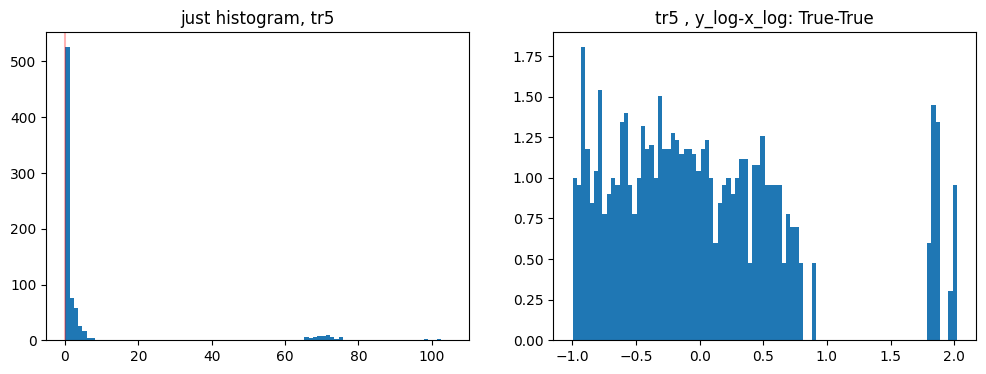

tr6 (1862, 8)


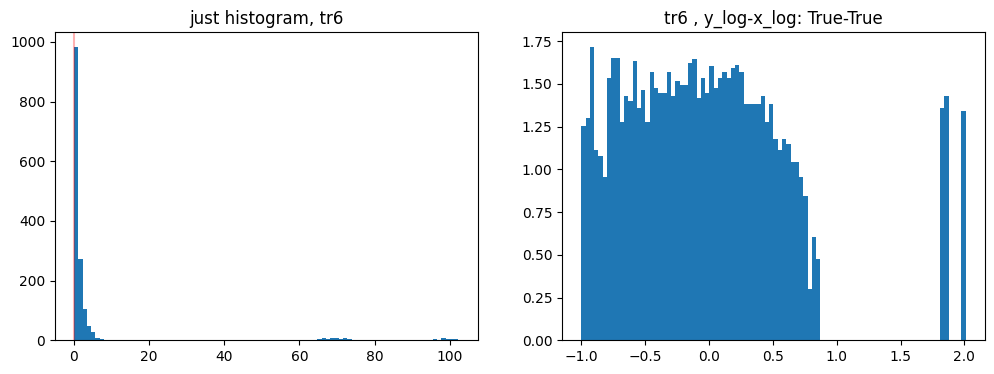

tr7 (1868, 8)


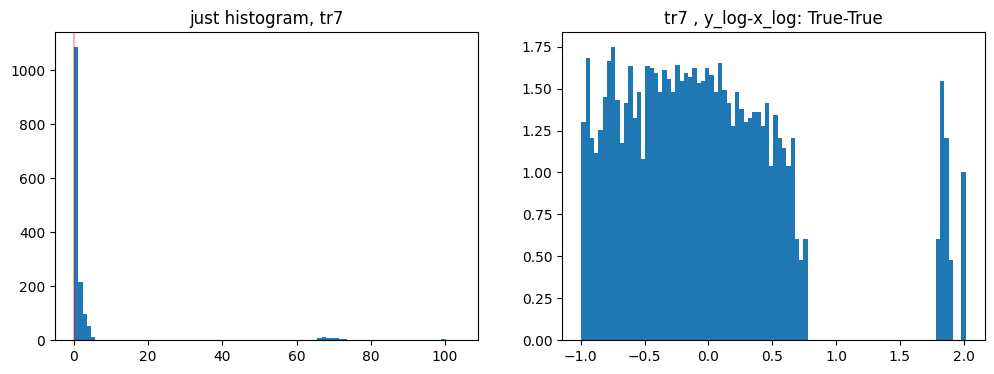

tr91 (1545, 8)


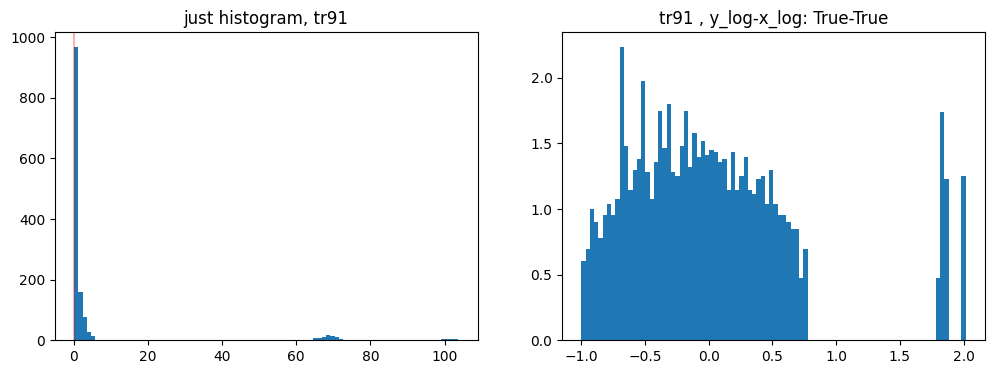

tr92 (460, 8)


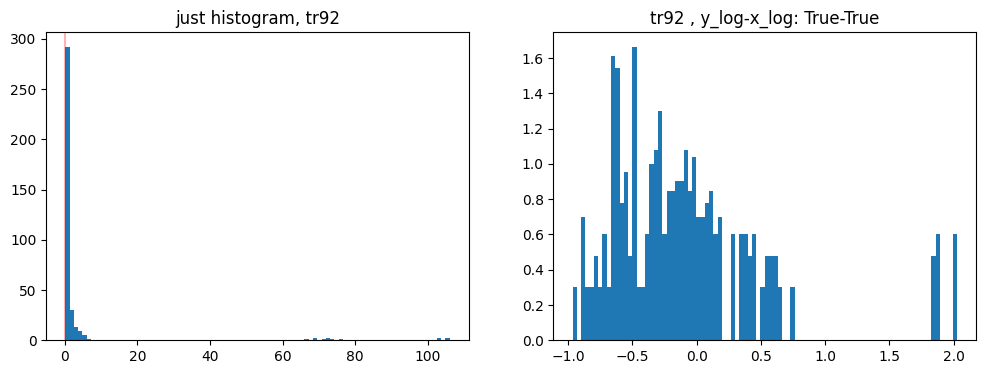

In [201]:
df_angls_hist = {}

for k, df in df_dict.items():
    df_in_area = df.loc[df['near_wall']>=10].copy()
    print(k, df_in_area.shape)

    plot_step_lens_hist(df_in_area, 90, k, y_log=True, x_log=True)

    # h = build_log_hist(df_in_area, binn=150, hist_title=f'{k}, area={area}',
    #                    y_log=True, x_log=False)

## проведем анализ walls

tr11 (2614, 8)


/tmp/ipykernel_13213/2113354128.py:24: RuntimeWarning: divide by zero encountered in log10
  hist = np.log10(hist)


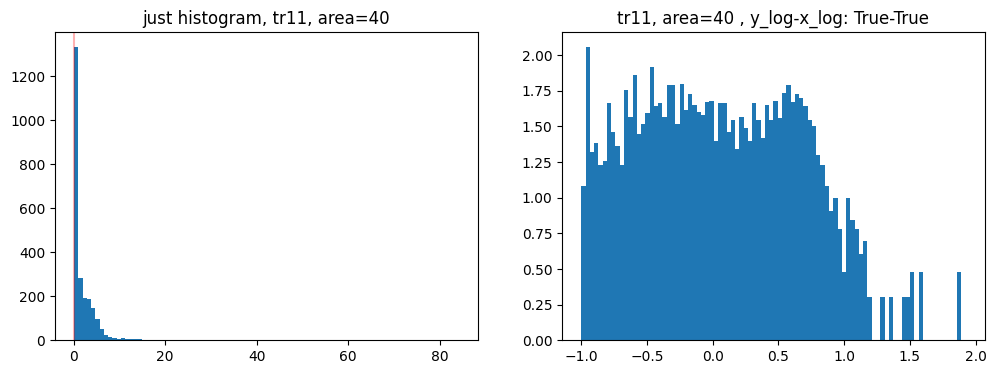

tr12 (2663, 8)


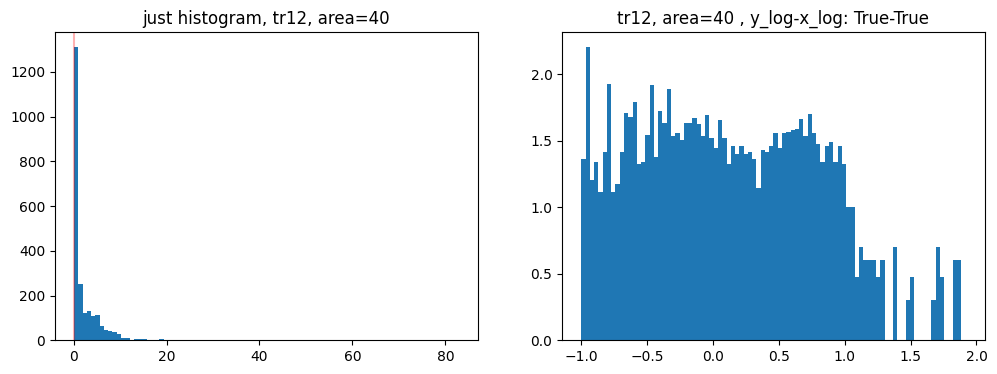

tr2 (2739, 8)


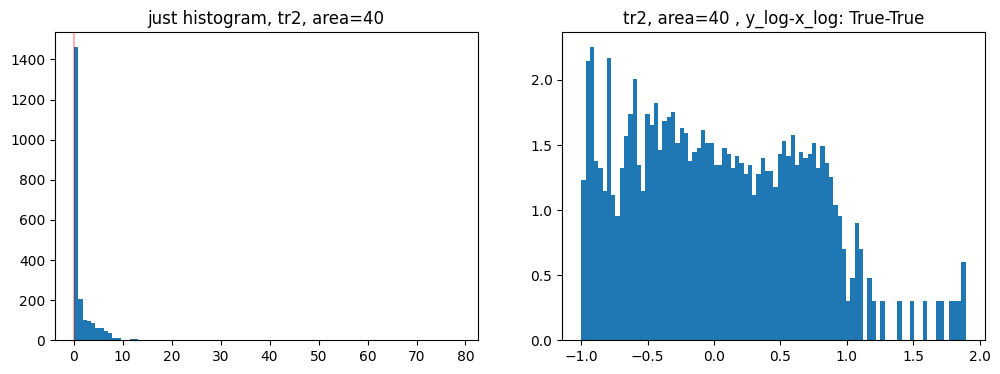

tr3 (1338, 8)


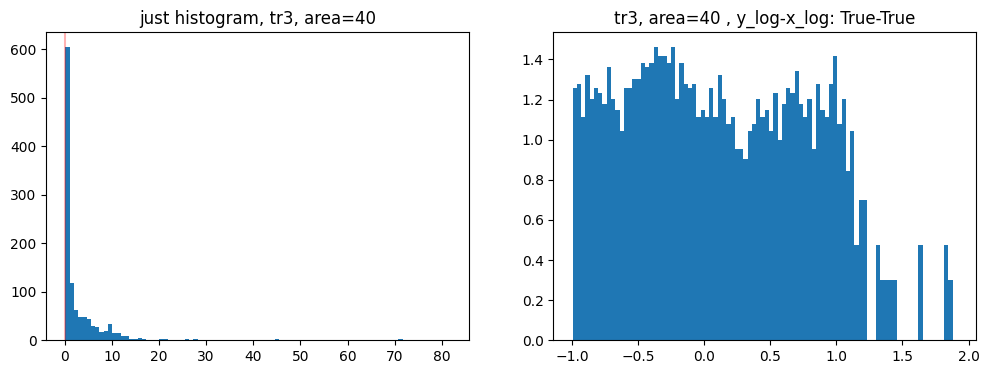

tr4 (344, 8)


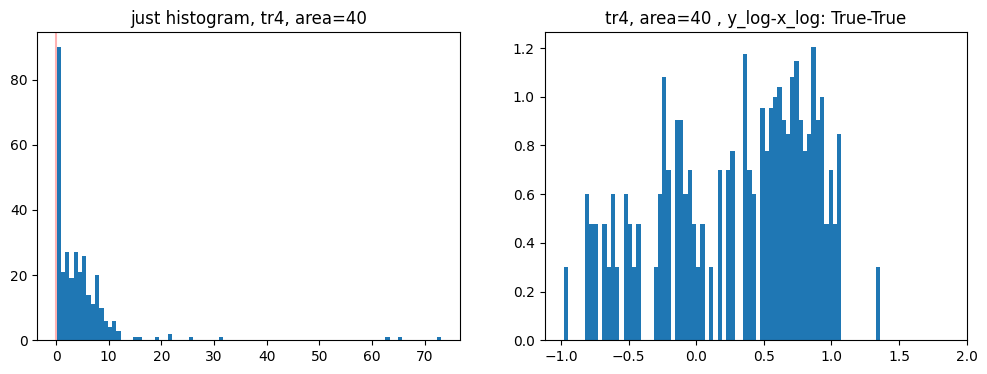

tr5 (1315, 8)


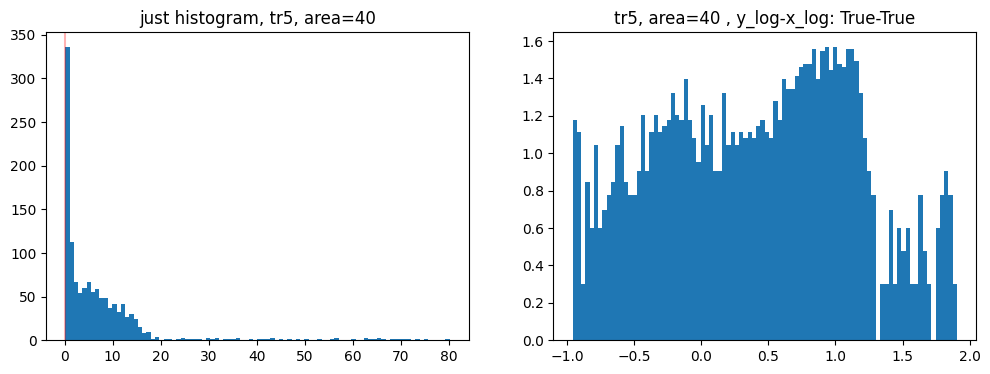

tr6 (2370, 8)


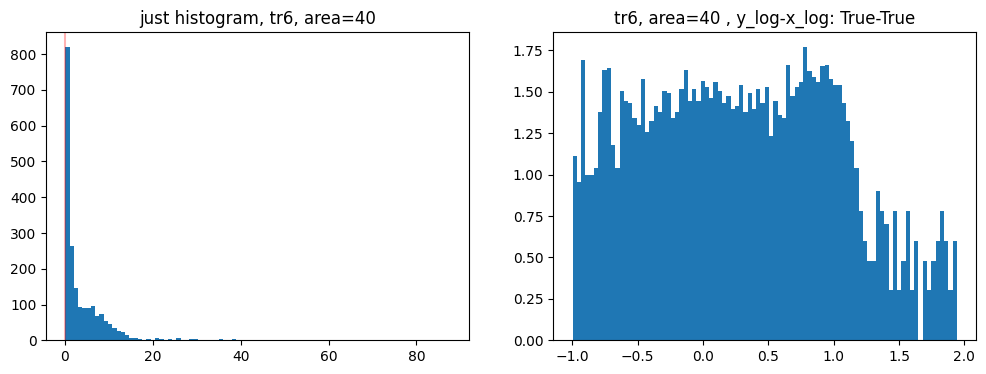

tr7 (2207, 8)


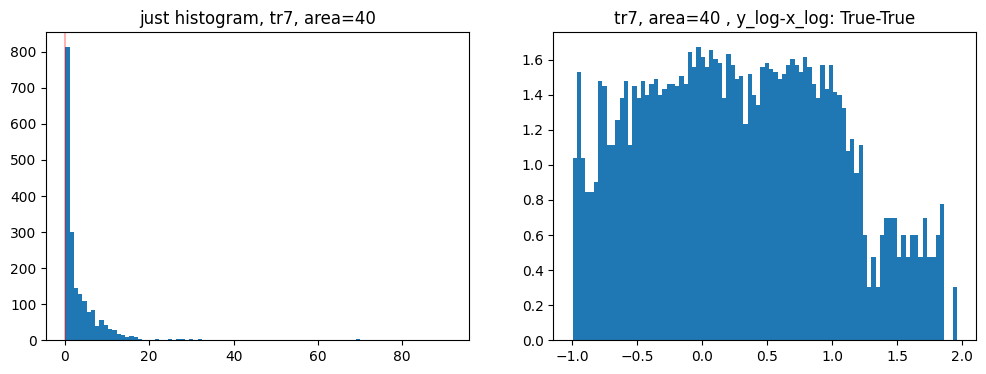

tr91 (3456, 8)


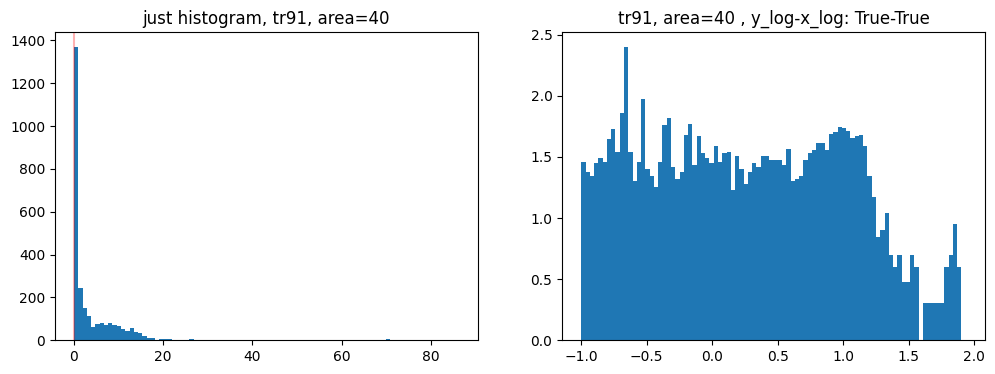

tr92 (3929, 8)


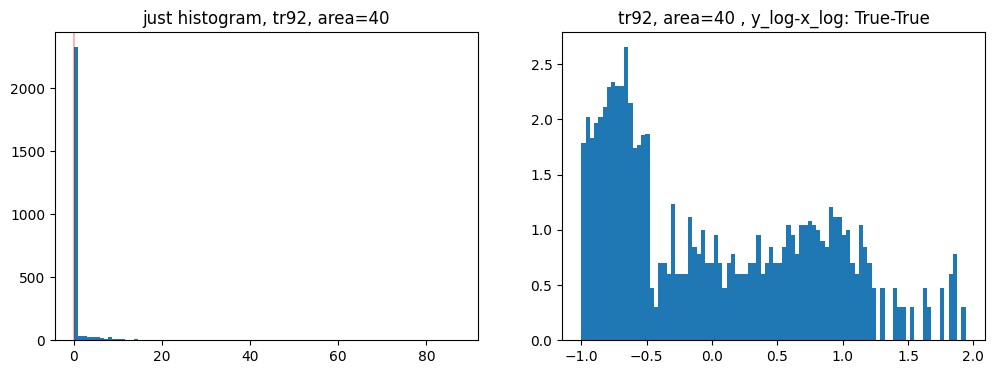

In [202]:
df_angls_hist = {}

for k, df in df_dict.items():
    df_in_area = df.loc[(df['near_wall']>=1) & (df['near_wall']<=4)].copy()
    print(k, df_in_area.shape)

    plot_step_lens_hist(df_in_area, 90, f'{k}, area={area}', y_log=True, x_log=True)

    # h = build_log_hist(df_in_area, binn=150, hist_title=f'{k}, area={area}', scale_log=True)

# Fit and Save distributions of center, walls, corners